<a href="https://colab.research.google.com/github/dev-69/MajorProject/blob/main/OverSamplingNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import gensim
from gensim.models import KeyedVectors

RuntimeError: Compiled extensions are unavailable. If you've installed from a package, ask the package maintainer to include compiled extensions. If you're building Gensim from source yourself, install Cython and a C compiler, and then run `python setup.py build_ext --inplace` to retry. 

In [ ]:
df = pd.read_pickle("/content/drive/MyDrive/Major Project Learnings/Prepared_Data.pkl")
df.head()

,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,NEXT_ADMITTIME,NEXT_ADMISSION_TYPE,DAYS_NEXT_ADMIT,index,CATEGORY,TEXT,OUTPUT_LABEL
1,3,145834,2101-10-20 19:08:00,2101-10-31 13:58:00,NaT,EMERGENCY,NaT,NaN,NaN,48470.0,Discharge summary,Admission Date: [**2101-10-20**] Discharg...,0
2,4,185777,2191-03-16 00:28:00,2191-03-23 18:41:00,NaT,EMERGENCY,NaT,NaN,NaN,4782.0,Discharge summary,Admission Date: [**2191-3-16**] Discharge...,0
4,6,107064,2175-05-30 07:15:00,2175-06-15 16:00:00,NaT,ELECTIVE,NaT,NaN,NaN,24476.0,Discharge summary,Admission Date: [**2175-5-30**] Dischar...,0
7,9,150750,2149-11-09 13:06:00,2149-11-14 10:15:00,2149-11-14 10:15:00,EMERGENCY,NaT,NaN,NaN,57341.0,Discharge summary,"Name: [**Known lastname 10050**], [**Known fi...",0
9,11,194540,2178-04-16 06:18:00,2178-05-11 19:00:00,NaT,EMERGENCY,NaT,NaN,NaN,34829.0,Discharge summary,Admission Date: [**2178-4-16**] ...,0


In [ ]:
df.TEXT = df.TEXT.fillna(' ')
df.TEXT = df.TEXT.str.replace('\n',' ')
df.TEXT = df.TEXT.str.replace('\r',' ')
df.TEXT = df.TEXT.str.lower()
df.TEXT = df.TEXT.str.replace(r'[^a-zA-Z\s]', '', regex=True)
df.TEXT = df.TEXT.str.replace(r'\s+', ' ', regex=True)
df.TEXT = df.TEXT.str.strip()

In [ ]:
df_filtered = df[['SUBJECT_ID', 'HADM_ID', 'TEXT', 'OUTPUT_LABEL']]
X = df_filtered['TEXT']
y = df_filtered['OUTPUT_LABEL']

df_filtered['OUTPUT_LABEL'].value_counts()


,count
OUTPUT_LABEL,
0,48109
1,3004


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_filtered['TEXT'], df_filtered['OUTPUT_LABEL'], test_size=0.2, random_state=42)

In [ ]:
import nltk

nltk.download('punkt_tab')
nltk.download('punkt')


from nltk import word_tokenize
word_tokenize('This should be tokenized. 02/02/2018 sentence has stars**')
import string
print(string.punctuation)
def tokenizer_better(text):
    punc_list = string.punctuation+'0123456789'
    t = str.maketrans(dict.fromkeys(punc_list, " "))
    text = text.lower().translate(t)
    tokens = word_tokenize(text)
    return tokens
my_stop_words = ['the','and','to','of','was','with','a','on','in','for','name',
                 'is','patient','s','he','at','as','or','one','she','his','her','am',
                 'were','you','pt','pm','by','be','had','your','this','date',
                'from','there','an','that','p','are','have','has','h','but','o',
                'namepattern','which','every','also']

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(max_features=1000, tokenizer=tokenizer_better, stop_words=my_stop_words)
X_train_vect = vect.fit_transform(X_train)
X_test_vect = vect.transform(X_test)

print("1. Using TF-IDF Vectorizer")

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


1. Using TF-IDF Vectorizer


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.gridspec import GridSpec
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

# Set Seaborn style
sns.set(style="whitegrid", palette="muted")

def create_sampling_visualization(X_train, y_train, technique_name, sampled_X, sampled_y):
    """
    Creates a comprehensive visualization for oversampling results including:
    1. Distribution before/after
    2. Class counts and percentages
    3. Sample increase statistics
    """
    # Create figure with custom layout
    fig = plt.figure(figsize=(20, 15))
    gs = GridSpec(3, 4, figure=fig)

    # Calculate metrics
    original_counts = np.bincount(y_train)
    sampled_counts = np.bincount(sampled_y)

    # Calculate increase metrics
    total_increase = len(sampled_y) - len(y_train)
    increase_percentage = (total_increase / len(y_train)) * 100

    # 1. Bar Plot (Before)
    ax1 = fig.add_subplot(gs[0, 0:2])
    sns.barplot(x=np.arange(len(original_counts)), y=original_counts, palette='Set2', ax=ax1)
    ax1.set_title(f'Class Distribution Before {technique_name}', pad=20, fontsize=12)
    ax1.set_xlabel('Class')
    ax1.set_ylabel('Count')
    ax1.set_xticks(np.arange(len(original_counts)))  # Class numbers (0, 1, etc.)
    ax1.grid(True, alpha=0.3)

    # 2. Bar Plot (After)
    ax2 = fig.add_subplot(gs[0, 2:])
    sns.barplot(x=np.arange(len(sampled_counts)), y=sampled_counts, palette='Set2', ax=ax2)
    ax2.set_title(f'Class Distribution After {technique_name}', pad=20, fontsize=12)
    ax2.set_xlabel('Class')
    ax2.set_ylabel('Count')
    ax2.set_xticks(np.arange(len(sampled_counts)))  # Class numbers (0, 1, etc.)
    ax2.grid(True, alpha=0.3)

    # 3. Pie Chart (Before)
    ax3 = fig.add_subplot(gs[1, 0:2])
    original_percentages = original_counts / len(y_train) * 100
    wedges, texts, autotexts = ax3.pie(original_percentages,
                                      labels=[f'Class {i}\n({count:,} samples)'
                                             for i, count in enumerate(original_counts)],
                                      autopct='%1.1f%%',
                                      colors=sns.color_palette('Set2', len(original_counts)))
    ax3.set_title('Class Distribution (Before)', pad=20, fontsize=12)

    # 4. Pie Chart (After)
    ax4 = fig.add_subplot(gs[1, 2:])
    sampled_percentages = sampled_counts / len(sampled_y) * 100
    wedges, texts, autotexts = ax4.pie(sampled_percentages,
                                      labels=[f'Class {i}\n({count:,} samples)'
                                             for i, count in enumerate(sampled_counts)],
                                      autopct='%1.1f%%',
                                      colors=sns.color_palette('Set2', len(sampled_counts)))
    ax4.set_title(f'Class Distribution (After)', pad=20, fontsize=12)

    # 5. Statistics Text Box
    ax5 = fig.add_subplot(gs[2, 0:2])
    stats_text = (
        f"Sampling Statistics - {technique_name}\n"
        f"------------------------\n"
        f"Total samples before: {len(y_train):,}\n"
        f"Total samples after: {len(sampled_y):,}\n"
        f"Samples added: {total_increase:,}\n"
        f"Increase: {increase_percentage:.1f}%\n\n"
        f"Class Distribution After Sampling:\n"
    )

    # Add class distribution
    for i, count in enumerate(sampled_counts):
        percentage = (count / len(sampled_y)) * 100
        stats_text += f"Class {i}: {count:,} samples ({percentage:.1f}%)\n"

    # Add imbalance metrics
    stats_text += "\nImbalance Metrics:\n"
    max_class = max(sampled_counts)
    min_class = min(sampled_counts)
    imbalance_ratio = max_class / min_class
    stats_text += f"Imbalance Ratio: {imbalance_ratio:.2f}\n"

    # Add class ratios
    stats_text += "\nClass Ratios (relative to majority class):\n"
    for i, count in enumerate(sampled_counts):
        ratio = max_class / count if count != 0 else float('inf')
        stats_text += f"Class {i}: 1:{ratio:.2f}\n"

    # Add text box
    ax5.text(0.05, 0.95, stats_text,
             transform=ax5.transAxes,
             fontsize=11,
             verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    ax5.axis('off')

    # Adjust layout
    plt.tight_layout()
    plt.show()

def visualize_all_techniques(X_train, y_train):
    """
    Visualize results for all oversampling techniques
    """
    # Original distribution
    print("\n📊 Original Data Distribution")
    plt.figure(figsize=(15, 5))

    # Bar plot
    plt.subplot(121)
    counts = np.bincount(y_train)
    sns.barplot(x=np.arange(len(counts)), y=counts, palette='Set2')
    plt.title('Original Class Distribution')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.xticks(np.arange(len(counts)))  # Class numbers (0, 1, etc.)
    plt.grid(True, alpha=0.3)

    # Pie Chart
    plt.subplot(122)
    original_percentages = counts / len(y_train) * 100
    wedges, texts, autotexts = plt.pie(original_percentages,
                                      labels=[f'Class {i}\n({count:,} samples)'
                                             for i, count in enumerate(counts)],
                                      autopct='%1.1f%%',
                                      colors=sns.color_palette('Set2', len(counts)))
    plt.title('Class Distribution (Before)', pad=20, fontsize=12)

    plt.tight_layout()
    plt.show()

    # Random Oversampling
    print("\n🎲 Random Oversampling Results")
    ros = RandomOverSampler()
    X_ros, y_ros = ros.fit_resample(X_train, y_train)
    create_sampling_visualization(X_train, y_train, 'Random Oversampling', X_ros, y_ros)

    # SMOTE
    print("\n🎯 SMOTE Results")
    smote = SMOTE()
    X_smote, y_smote = smote.fit_resample(X_train, y_train)
    create_sampling_visualization(X_train, y_train, 'SMOTE', X_smote, y_smote)

    # ADASYN
    print("\n🔬 ADASYN Results")
    adasyn = ADASYN()
    X_adasyn, y_adasyn = adasyn.fit_resample(X_train, y_train)
    create_sampling_visualization(X_train, y_train, 'ADASYN', X_adasyn, y_adasyn)

    return X_ros, y_ros, X_smote, y_smote, X_adasyn, y_adasyn



📊 Original Data Distribution


<ipython-input-8-0f8737b402d0>:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(len(counts)), y=counts, palette='Set2')


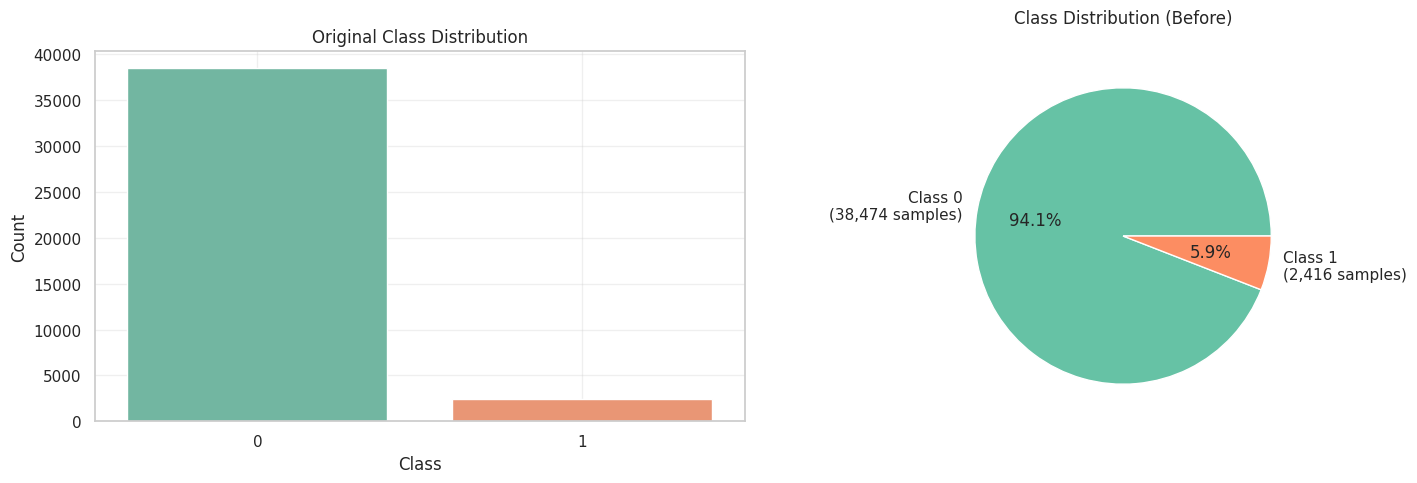


🎲 Random Oversampling Results


<ipython-input-8-0f8737b402d0>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(len(original_counts)), y=original_counts, palette='Set2', ax=ax1)
<ipython-input-8-0f8737b402d0>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(len(sampled_counts)), y=sampled_counts, palette='Set2', ax=ax2)


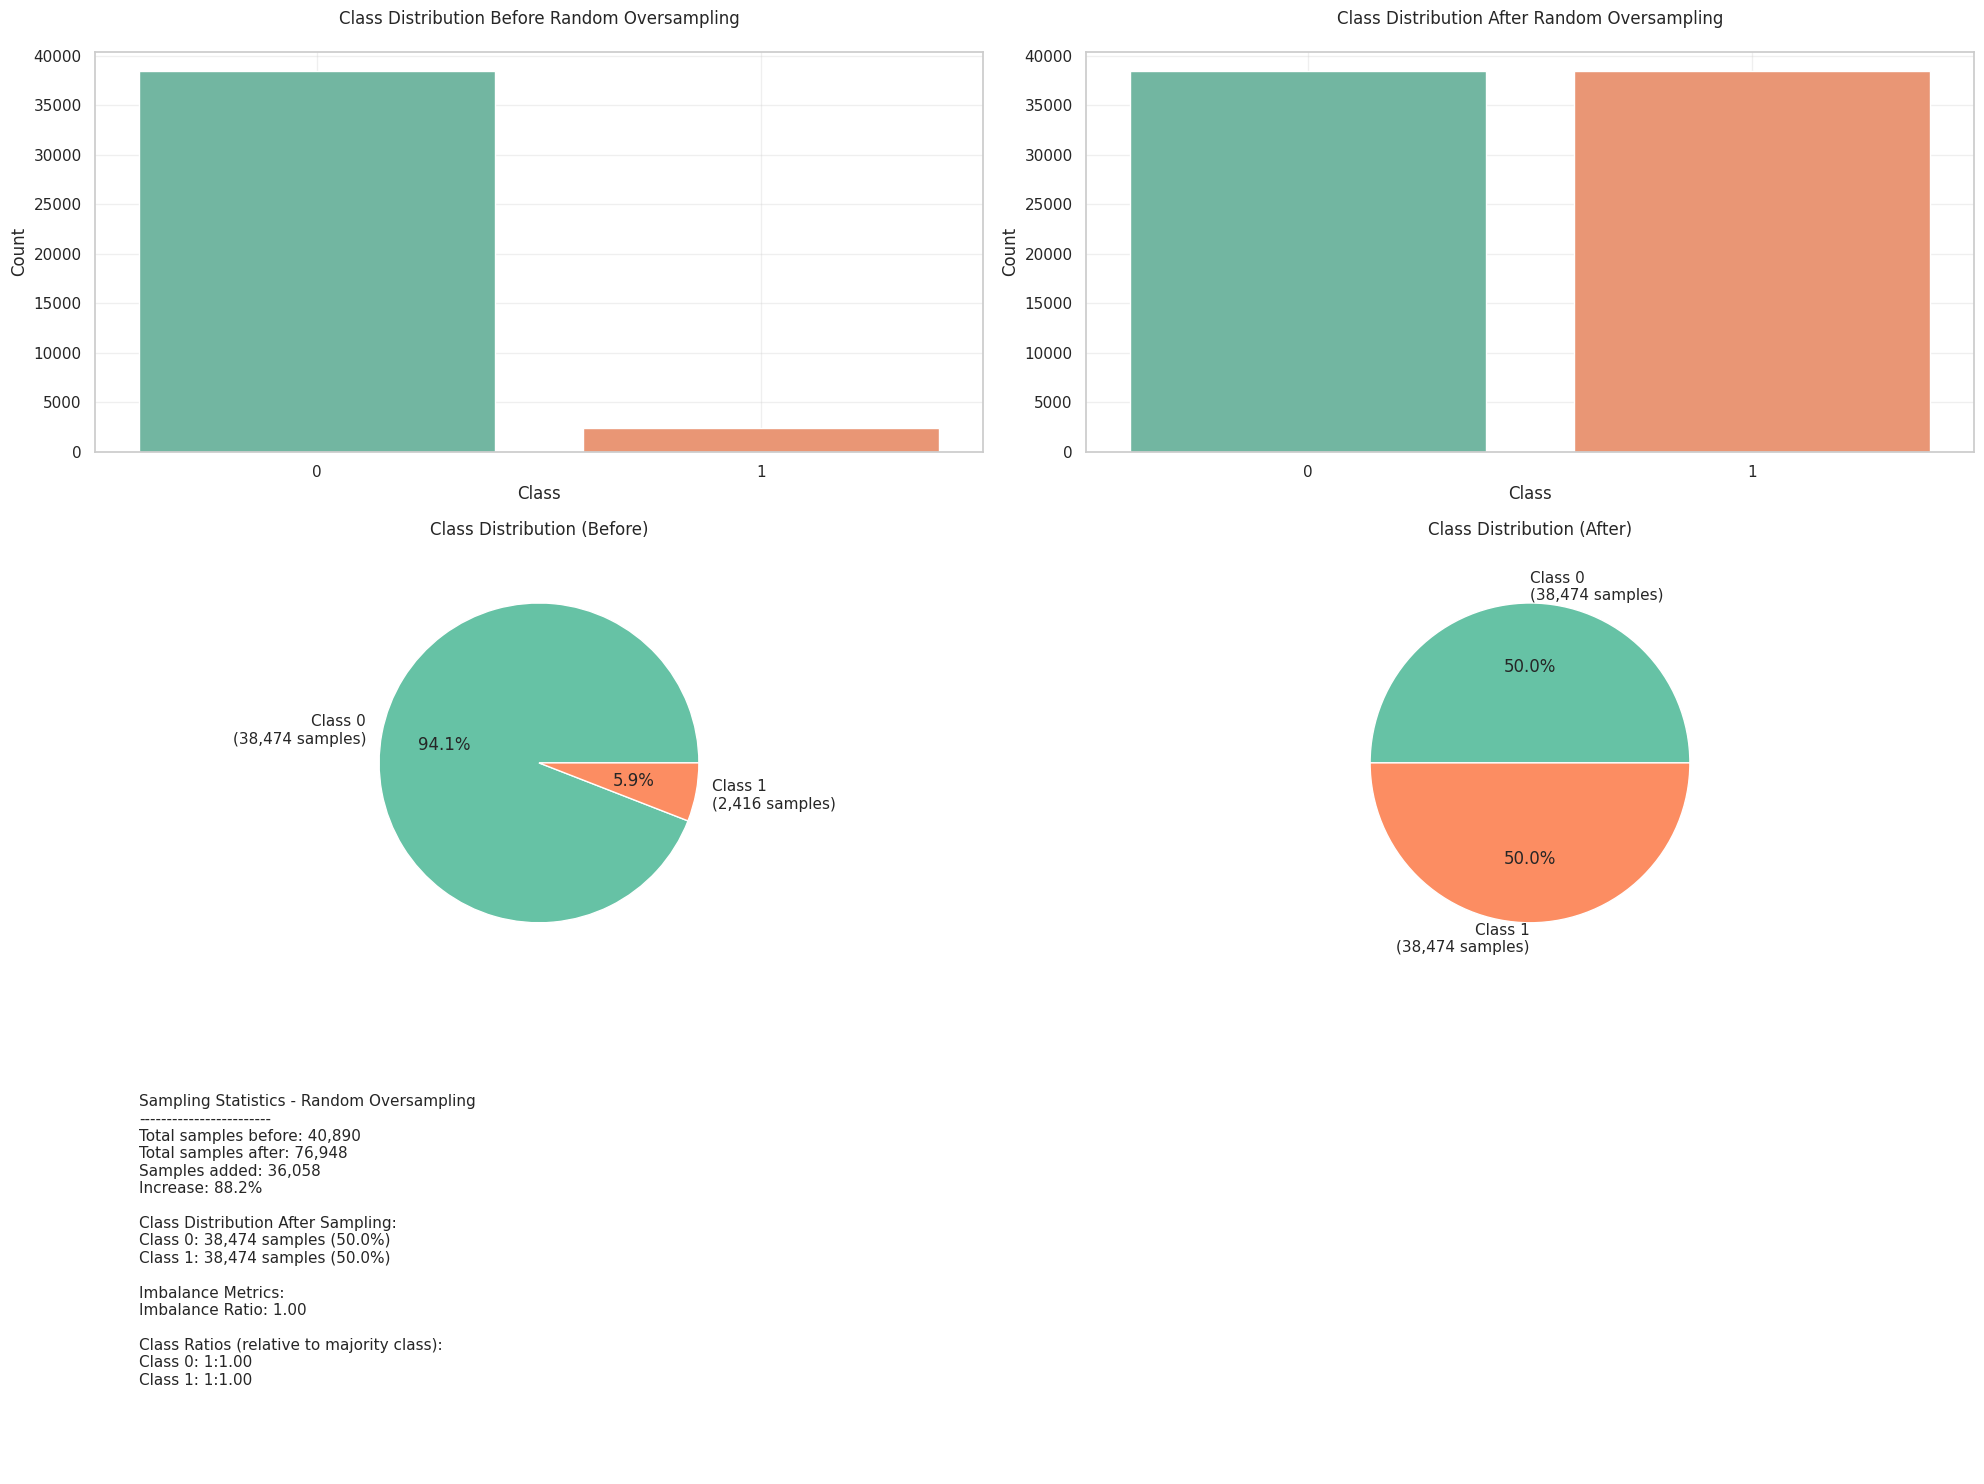


🎯 SMOTE Results


<ipython-input-8-0f8737b402d0>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(len(original_counts)), y=original_counts, palette='Set2', ax=ax1)
<ipython-input-8-0f8737b402d0>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(len(sampled_counts)), y=sampled_counts, palette='Set2', ax=ax2)


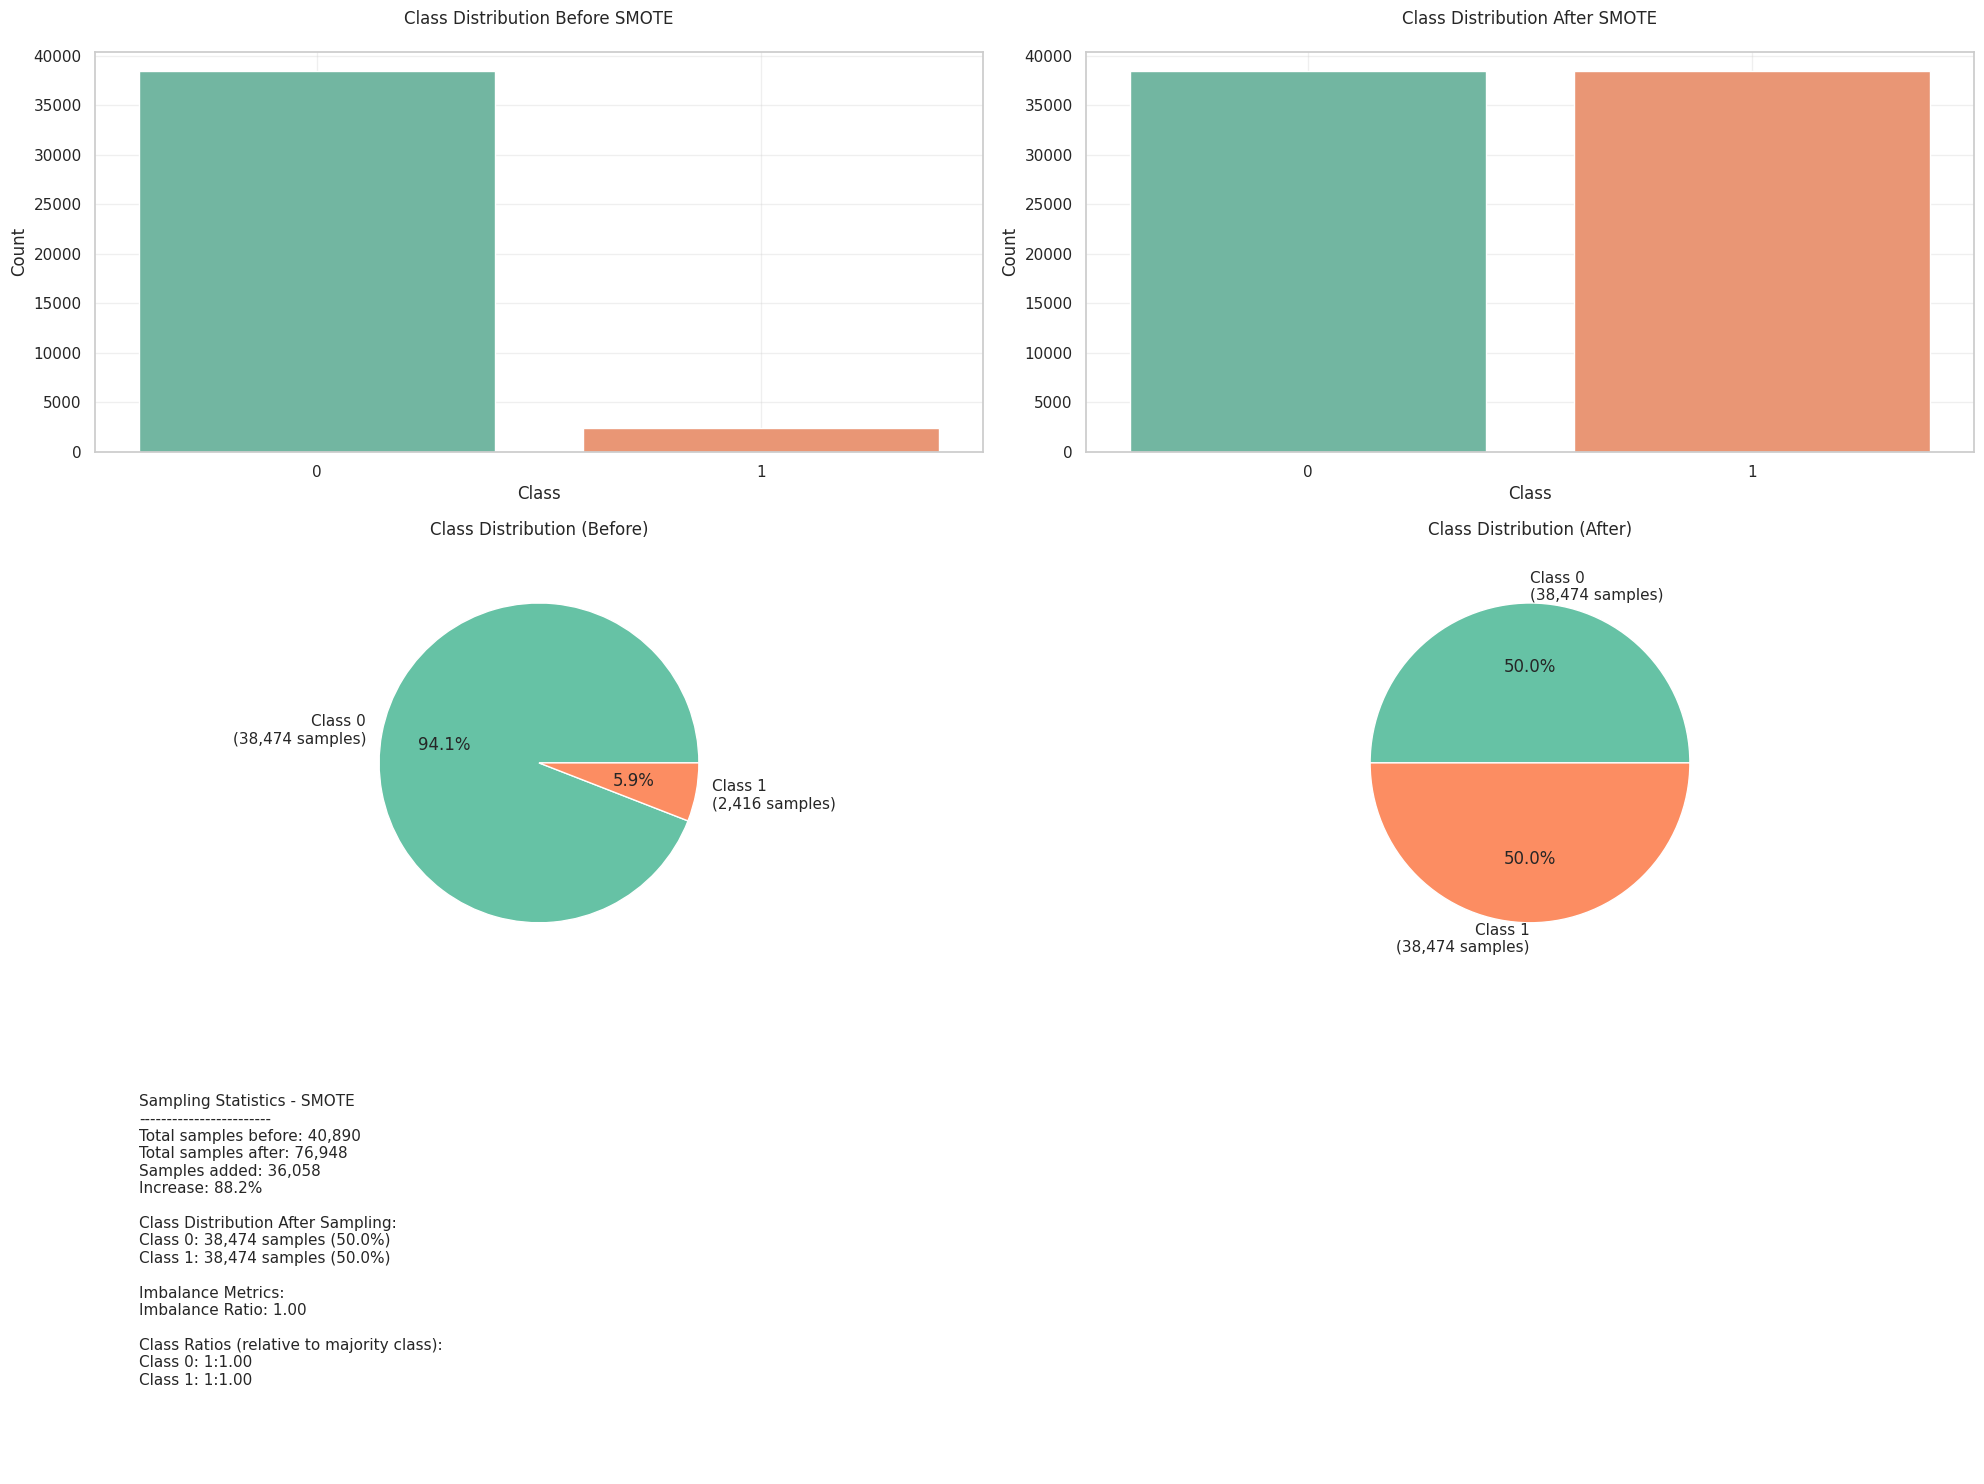


🔬 ADASYN Results


<ipython-input-8-0f8737b402d0>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(len(original_counts)), y=original_counts, palette='Set2', ax=ax1)
<ipython-input-8-0f8737b402d0>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(len(sampled_counts)), y=sampled_counts, palette='Set2', ax=ax2)


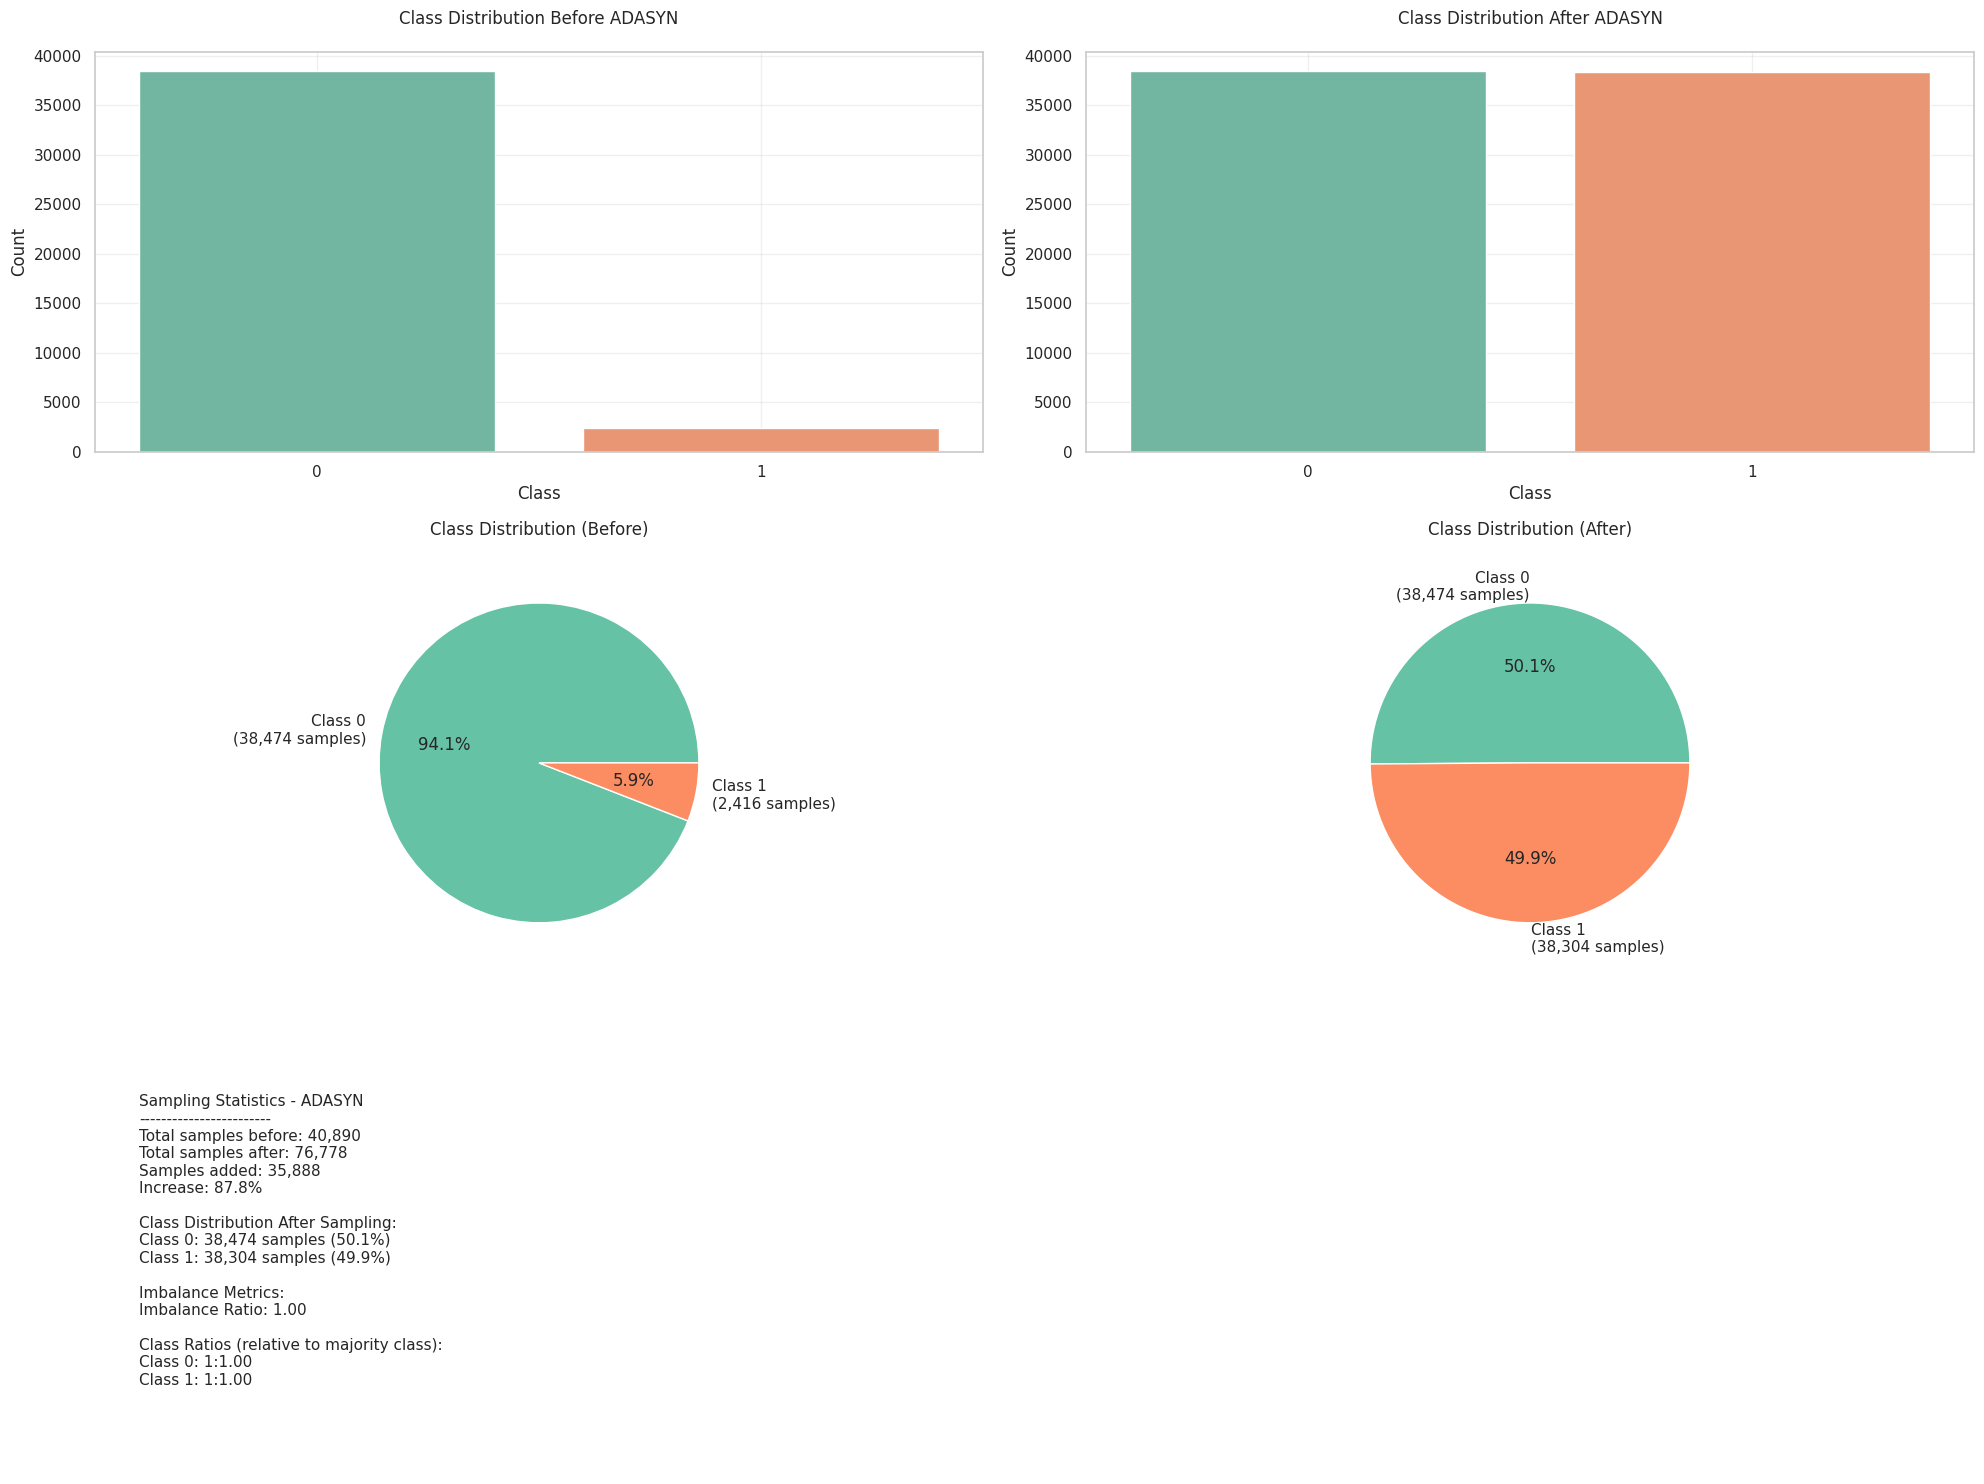

In [ ]:
X_ros, y_ros, X_smote, y_smote, X_adasyn, y_adasyn = visualize_all_techniques(X_train_vect, y_train)

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_auc_score, classification_report
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
def classification(X_train, y_train, X_test, y_test):

    classifiers = [
        KNeighborsClassifier(3),
        DecisionTreeClassifier(max_depth=19, min_samples_split=10),
        RandomForestClassifier(n_estimators=450),
        AdaBoostClassifier(n_estimators=100),
        GradientBoostingClassifier(n_estimators=300),
        LogisticRegression(C=1, penalty='l2')]

    for clf in classifiers:
        clf.fit(X_train, y_train)
        name = clf.__class__.__name__

        print("="*30)
        print(name)

        print('****Results****')
        train_predictions = clf.predict(X_test)

        # AUC Score
        acc = roc_auc_score(y_test, train_predictions)
        print("AUC: {:.4%}".format(acc))

        # Classification Report
        print("Classification report: \n", classification_report_imbalanced(y_test, train_predictions))

        # Confusion Matrix
        cm = confusion_matrix(y_test, train_predictions)

        # Plot confusion matrix using seaborn heatmap
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
        plt.title(f'Confusion Matrix for {name}')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()

    print("="*30)


In [ ]:
def oversampling_results(X_ros, y_ros, X_smote, y_smote, X_adasyn, y_adasyn, X_test_vect, y_test):
    """
    Evaluate oversampling results using RandomOverSampler, SMOTE, and ADASYN.
    """

    print("Random Oversampler results \n")
    classification(X_ros, y_ros, X_test_vect, y_test)

    print("SMOTE results \n")
    classification(X_smote, y_smote, X_test_vect, y_test)

    print("ADASYN results \n")
    classification(X_adasyn, y_adasyn, X_test_vect, y_test)


Random Oversampler results 

KNeighborsClassifier
****Results****
AUC: 55.8718%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.89      0.23      0.92      0.45      0.22      9635
          1       0.11      0.23      0.89      0.15      0.45      0.19       588

avg / total       0.90      0.85      0.27      0.87      0.45      0.22     10223



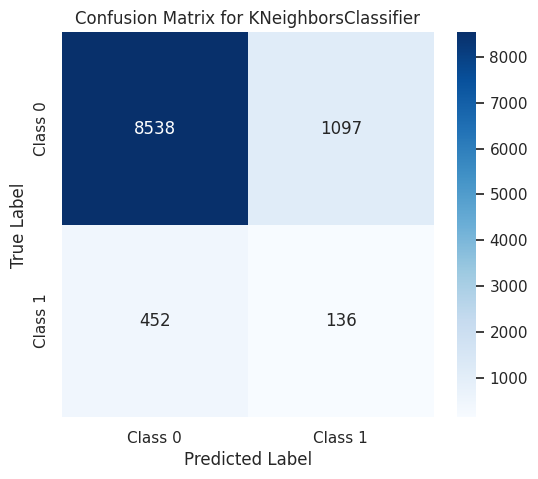

DecisionTreeClassifier
****Results****
AUC: 56.3844%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.80      0.33      0.87      0.51      0.28      9635
          1       0.09      0.33      0.80      0.14      0.51      0.25       588

avg / total       0.90      0.77      0.36      0.83      0.51      0.27     10223



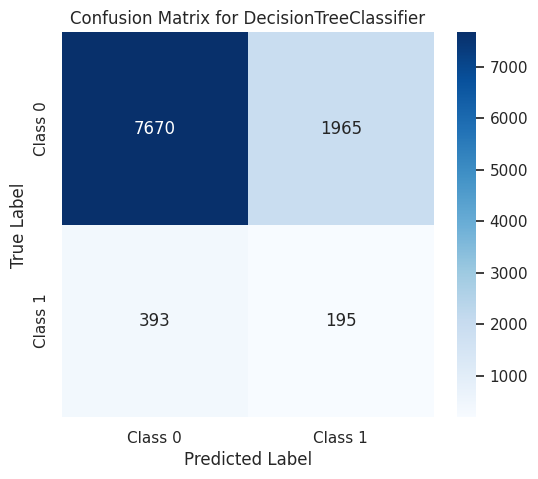

RandomForestClassifier
****Results****
AUC: 50.0850%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.94      1.00      0.00      0.97      0.04      0.00      9635
          1       1.00      0.00      1.00      0.00      0.04      0.00       588

avg / total       0.95      0.94      0.06      0.91      0.04      0.00     10223



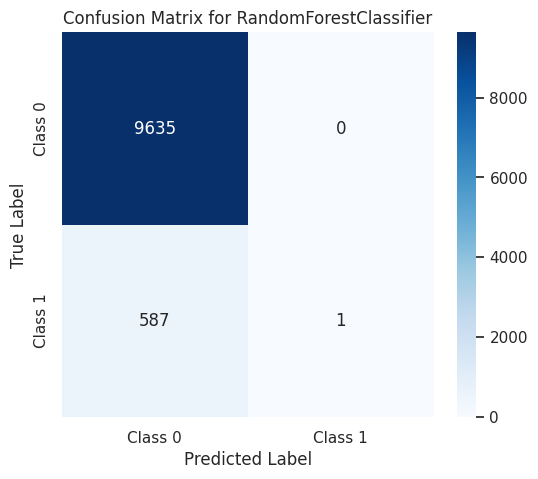

AdaBoostClassifier
****Results****
AUC: 65.5953%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.97      0.70      0.61      0.81      0.65      0.43      9635
          1       0.11      0.61      0.70      0.19      0.65      0.42       588

avg / total       0.92      0.70      0.61      0.78      0.65      0.43     10223



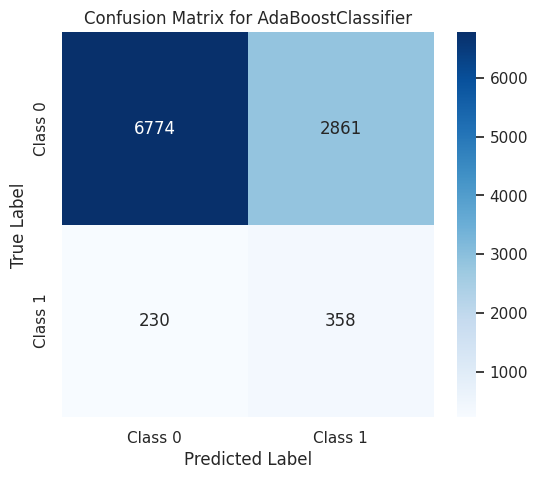

GradientBoostingClassifier
****Results****
AUC: 64.7082%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.96      0.79      0.50      0.87      0.63      0.41      9635
          1       0.13      0.50      0.79      0.20      0.63      0.39       588

avg / total       0.92      0.77      0.52      0.83      0.63      0.41     10223



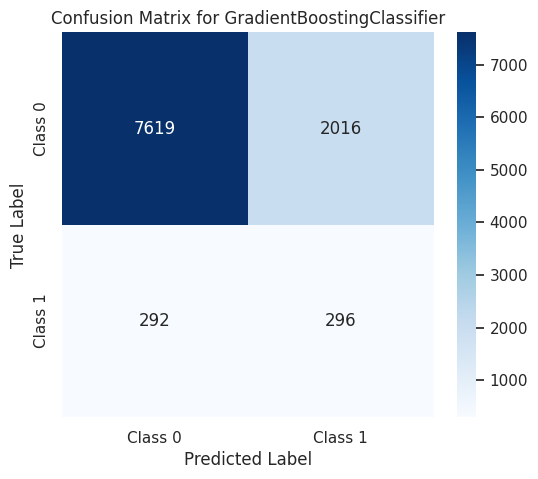

LogisticRegression
****Results****
AUC: 66.7258%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.97      0.71      0.63      0.82      0.67      0.45      9635
          1       0.12      0.63      0.71      0.20      0.67      0.44       588

avg / total       0.92      0.70      0.63      0.78      0.67      0.45     10223



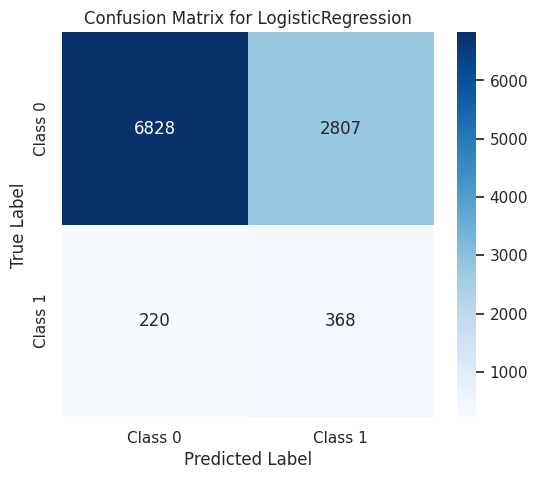

SMOTE results 

KNeighborsClassifier
****Results****
AUC: 53.5590%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.96      0.20      0.88      0.32      0.41      0.16      9635
          1       0.06      0.88      0.20      0.12      0.41      0.18       588

avg / total       0.91      0.23      0.84      0.31      0.41      0.16     10223



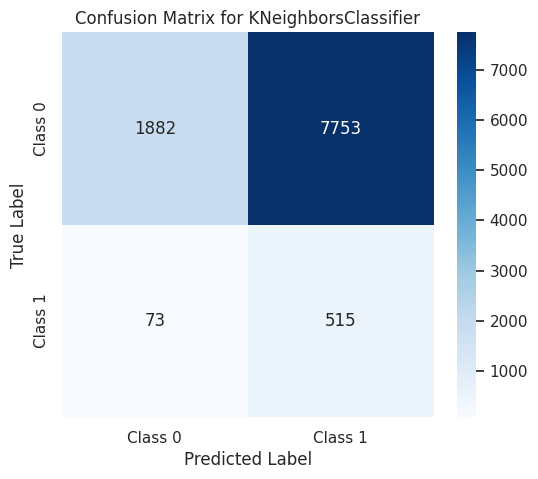

DecisionTreeClassifier
****Results****
AUC: 53.5815%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.89      0.18      0.92      0.40      0.17      9635
          1       0.09      0.18      0.89      0.12      0.40      0.15       588

avg / total       0.90      0.85      0.22      0.87      0.40      0.17     10223



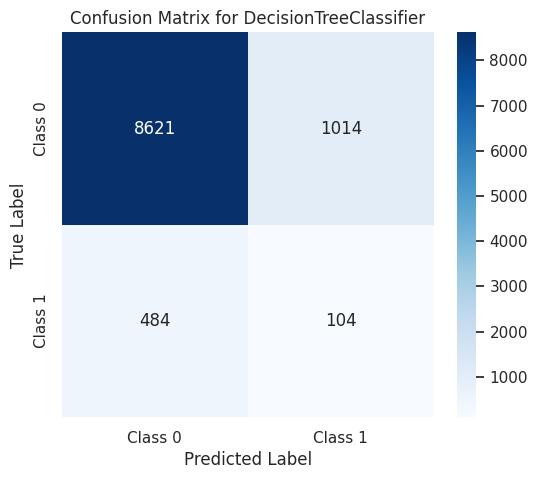

RandomForestClassifier
****Results****
AUC: 51.1238%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.94      0.99      0.03      0.97      0.17      0.03      9635
          1       0.22      0.03      0.99      0.05      0.17      0.03       588

avg / total       0.90      0.94      0.08      0.92      0.17      0.03     10223



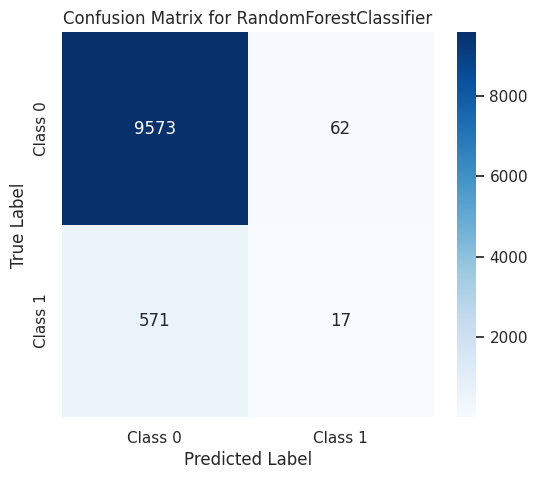

AdaBoostClassifier
****Results****
AUC: 57.9326%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.89      0.27      0.92      0.49      0.25      9635
          1       0.13      0.27      0.89      0.18      0.49      0.22       588

avg / total       0.90      0.86      0.30      0.88      0.49      0.25     10223



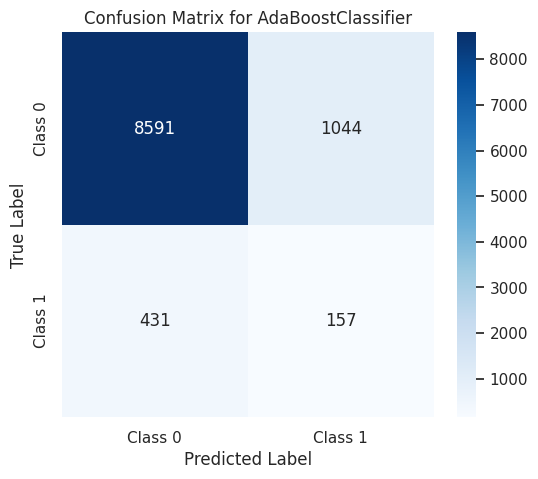

GradientBoostingClassifier
****Results****
AUC: 52.1727%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.94      0.98      0.06      0.96      0.25      0.07      9635
          1       0.16      0.06      0.98      0.09      0.25      0.06       588

avg / total       0.90      0.93      0.12      0.91      0.25      0.07     10223



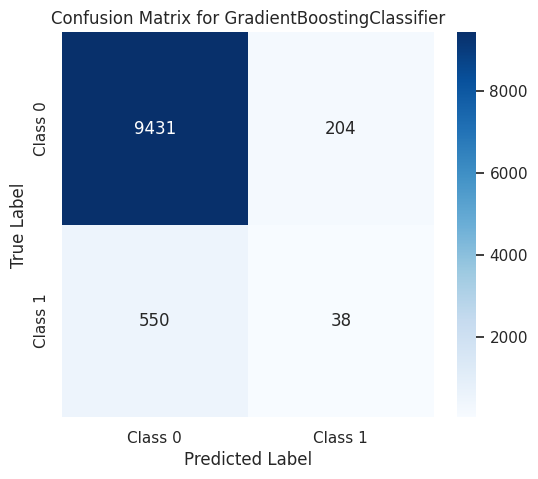

LogisticRegression
****Results****
AUC: 64.8691%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.97      0.70      0.60      0.81      0.65      0.42      9635
          1       0.11      0.60      0.70      0.18      0.65      0.41       588

avg / total       0.92      0.69      0.61      0.77      0.65      0.42     10223



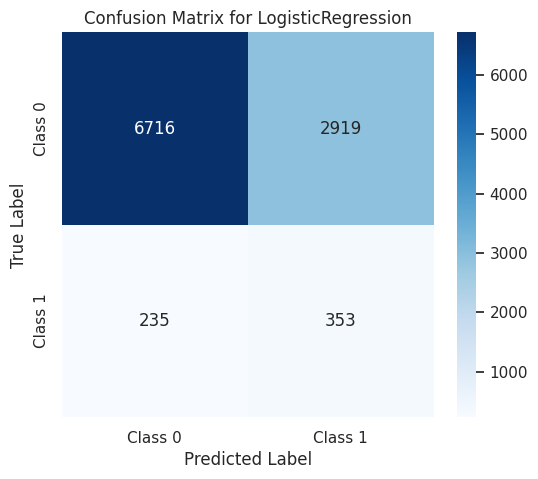

ADASYN results 

KNeighborsClassifier
****Results****
AUC: 53.7870%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.96      0.19      0.88      0.32      0.41      0.16      9635
          1       0.06      0.88      0.19      0.12      0.41      0.18       588

avg / total       0.91      0.23      0.84      0.31      0.41      0.16     10223



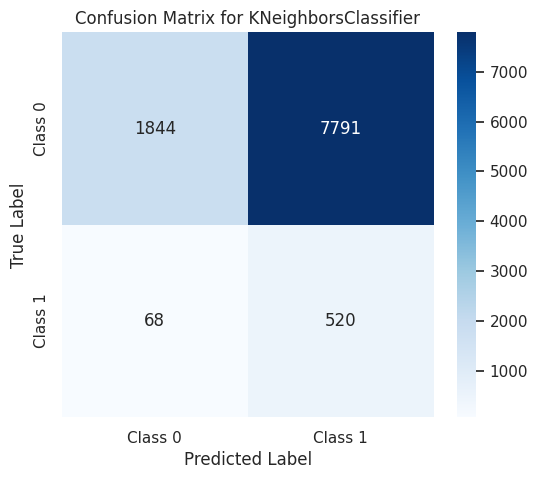

DecisionTreeClassifier
****Results****
AUC: 53.6022%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.90      0.18      0.92      0.40      0.17      9635
          1       0.09      0.18      0.90      0.12      0.40      0.15       588

avg / total       0.90      0.85      0.22      0.87      0.40      0.17     10223



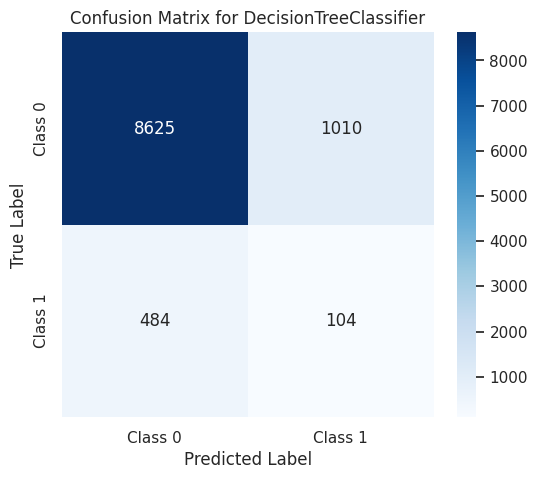

RandomForestClassifier
****Results****
AUC: 51.0232%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.94      0.99      0.03      0.97      0.16      0.03      9635
          1       0.20      0.03      0.99      0.05      0.16      0.02       588

avg / total       0.90      0.94      0.08      0.91      0.16      0.03     10223



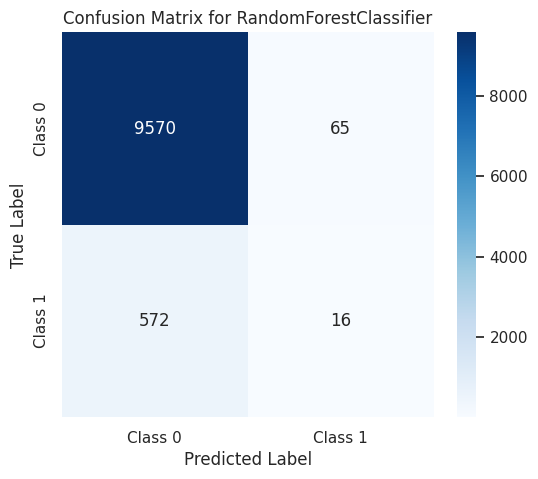

AdaBoostClassifier
****Results****
AUC: 56.7394%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.88      0.26      0.91      0.48      0.24      9635
          1       0.11      0.26      0.88      0.16      0.48      0.21       588

avg / total       0.90      0.84      0.29      0.87      0.48      0.24     10223



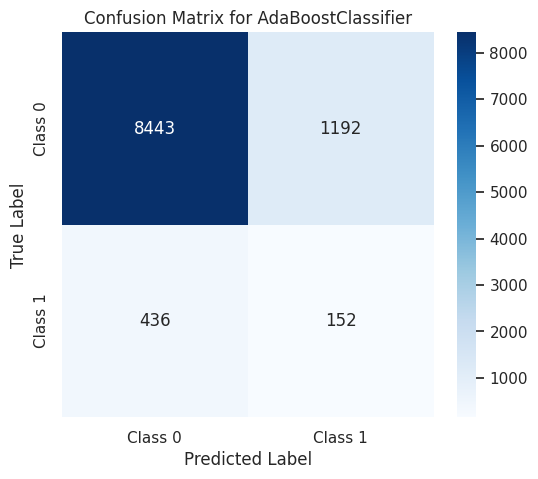

GradientBoostingClassifier
****Results****
AUC: 51.5255%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.94      0.98      0.05      0.96      0.23      0.06      9635
          1       0.13      0.05      0.98      0.07      0.23      0.05       588

avg / total       0.90      0.92      0.11      0.91      0.23      0.06     10223



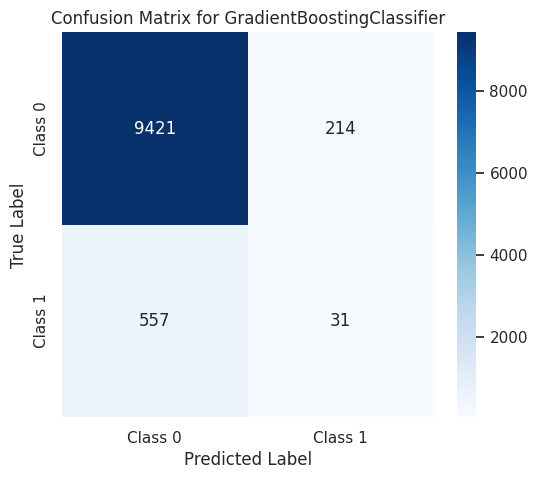

LogisticRegression
****Results****
AUC: 63.7190%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.96      0.69      0.58      0.81      0.63      0.41      9635
          1       0.10      0.58      0.69      0.18      0.63      0.40       588

avg / total       0.91      0.69      0.59      0.77      0.63      0.41     10223



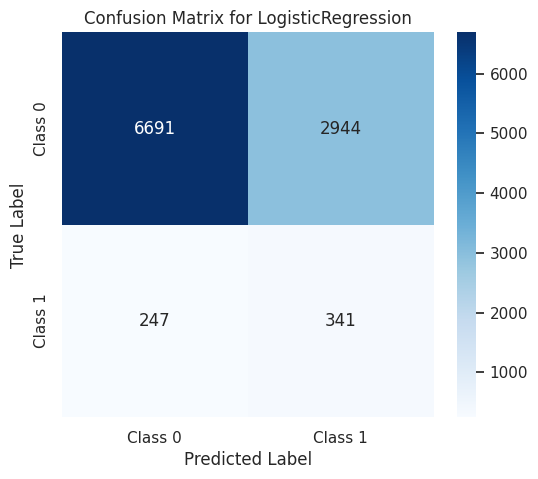

In [ ]:
oversampling_results(X_ros, y_ros, X_smote, y_smote, X_adasyn, y_adasyn, X_test_vect, y_test)

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import gensim
from gensim.models import KeyedVectors

In [3]:
df = pd.read_pickle("/content/drive/MyDrive/Major Project Learnings/Prepared_Data.pkl")
df.head()

,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,NEXT_ADMITTIME,NEXT_ADMISSION_TYPE,DAYS_NEXT_ADMIT,index,CATEGORY,TEXT,OUTPUT_LABEL
1,3,145834,2101-10-20 19:08:00,2101-10-31 13:58:00,NaT,EMERGENCY,NaT,NaN,NaN,48470.0,Discharge summary,Admission Date: [**2101-10-20**] Discharg...,0
2,4,185777,2191-03-16 00:28:00,2191-03-23 18:41:00,NaT,EMERGENCY,NaT,NaN,NaN,4782.0,Discharge summary,Admission Date: [**2191-3-16**] Discharge...,0
4,6,107064,2175-05-30 07:15:00,2175-06-15 16:00:00,NaT,ELECTIVE,NaT,NaN,NaN,24476.0,Discharge summary,Admission Date: [**2175-5-30**] Dischar...,0
7,9,150750,2149-11-09 13:06:00,2149-11-14 10:15:00,2149-11-14 10:15:00,EMERGENCY,NaT,NaN,NaN,57341.0,Discharge summary,"Name: [**Known lastname 10050**], [**Known fi...",0
9,11,194540,2178-04-16 06:18:00,2178-05-11 19:00:00,NaT,EMERGENCY,NaT,NaN,NaN,34829.0,Discharge summary,Admission Date: [**2178-4-16**] ...,0


In [4]:
df.TEXT = df.TEXT.fillna(' ')
df.TEXT = df.TEXT.str.replace('\n',' ')
df.TEXT = df.TEXT.str.replace('\r',' ')
df.TEXT = df.TEXT.str.lower()
df.TEXT = df.TEXT.str.replace(r'[^a-zA-Z\s]', '', regex=True)
df.TEXT = df.TEXT.str.replace(r'\s+', ' ', regex=True)
df.TEXT = df.TEXT.str.strip()

In [5]:
df_filtered = df[['SUBJECT_ID', 'HADM_ID', 'TEXT', 'OUTPUT_LABEL']]
X = df_filtered['TEXT']
y = df_filtered['OUTPUT_LABEL']

df_filtered['OUTPUT_LABEL'].value_counts()


,count
OUTPUT_LABEL,
0,48109
1,3004


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_filtered['TEXT'], df_filtered['OUTPUT_LABEL'], test_size=0.2, random_state=42)

In [7]:
import nltk

nltk.download('punkt_tab')
nltk.download('punkt')


from nltk import word_tokenize
word_tokenize('This should be tokenized. 02/02/2018 sentence has stars**')
import string
print(string.punctuation)
def tokenizer_better(text):
    punc_list = string.punctuation+'0123456789'
    t = str.maketrans(dict.fromkeys(punc_list, " "))
    text = text.lower().translate(t)
    tokens = word_tokenize(text)
    return tokens
my_stop_words = ['the','and','to','of','was','with','a','on','in','for','name',
                 'is','patient','s','he','at','as','or','one','she','his','her','am',
                 'were','you','pt','pm','by','be','had','your','this','date',
                'from','there','an','that','p','are','have','has','h','but','o',
                'namepattern','which','every','also']

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.gridspec import GridSpec
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

# Set Seaborn style
sns.set(style="whitegrid", palette="muted")

def create_sampling_visualization(X_train, y_train, technique_name, sampled_X, sampled_y):
    """
    Creates a comprehensive visualization for oversampling results including:
    1. Distribution before/after
    2. Class counts and percentages
    3. Sample increase statistics
    """
    # Create figure with custom layout
    fig = plt.figure(figsize=(20, 15))
    gs = GridSpec(3, 4, figure=fig)

    # Calculate metrics
    original_counts = np.bincount(y_train)
    sampled_counts = np.bincount(sampled_y)

    # Calculate increase metrics
    total_increase = len(sampled_y) - len(y_train)
    increase_percentage = (total_increase / len(y_train)) * 100

    # 1. Bar Plot (Before)
    ax1 = fig.add_subplot(gs[0, 0:2])
    sns.barplot(x=np.arange(len(original_counts)), y=original_counts, palette='Set2', ax=ax1)
    ax1.set_title(f'Class Distribution Before {technique_name}', pad=20, fontsize=12)
    ax1.set_xlabel('Class')
    ax1.set_ylabel('Count')
    ax1.set_xticks(np.arange(len(original_counts)))  # Class numbers (0, 1, etc.)
    ax1.grid(True, alpha=0.3)

    # 2. Bar Plot (After)
    ax2 = fig.add_subplot(gs[0, 2:])
    sns.barplot(x=np.arange(len(sampled_counts)), y=sampled_counts, palette='Set2', ax=ax2)
    ax2.set_title(f'Class Distribution After {technique_name}', pad=20, fontsize=12)
    ax2.set_xlabel('Class')
    ax2.set_ylabel('Count')
    ax2.set_xticks(np.arange(len(sampled_counts)))  # Class numbers (0, 1, etc.)
    ax2.grid(True, alpha=0.3)

    # 3. Pie Chart (Before)
    ax3 = fig.add_subplot(gs[1, 0:2])
    original_percentages = original_counts / len(y_train) * 100
    wedges, texts, autotexts = ax3.pie(original_percentages,
                                      labels=[f'Class {i}\n({count:,} samples)'
                                             for i, count in enumerate(original_counts)],
                                      autopct='%1.1f%%',
                                      colors=sns.color_palette('Set2', len(original_counts)))
    ax3.set_title('Class Distribution (Before)', pad=20, fontsize=12)

    # 4. Pie Chart (After)
    ax4 = fig.add_subplot(gs[1, 2:])
    sampled_percentages = sampled_counts / len(sampled_y) * 100
    wedges, texts, autotexts = ax4.pie(sampled_percentages,
                                      labels=[f'Class {i}\n({count:,} samples)'
                                             for i, count in enumerate(sampled_counts)],
                                      autopct='%1.1f%%',
                                      colors=sns.color_palette('Set2', len(sampled_counts)))
    ax4.set_title(f'Class Distribution (After)', pad=20, fontsize=12)

    # 5. Statistics Text Box
    ax5 = fig.add_subplot(gs[2, 0:2])
    stats_text = (
        f"Sampling Statistics - {technique_name}\n"
        f"------------------------\n"
        f"Total samples before: {len(y_train):,}\n"
        f"Total samples after: {len(sampled_y):,}\n"
        f"Samples added: {total_increase:,}\n"
        f"Increase: {increase_percentage:.1f}%\n\n"
        f"Class Distribution After Sampling:\n"
    )

    # Add class distribution
    for i, count in enumerate(sampled_counts):
        percentage = (count / len(sampled_y)) * 100
        stats_text += f"Class {i}: {count:,} samples ({percentage:.1f}%)\n"

    # Add imbalance metrics
    stats_text += "\nImbalance Metrics:\n"
    max_class = max(sampled_counts)
    min_class = min(sampled_counts)
    imbalance_ratio = max_class / min_class
    stats_text += f"Imbalance Ratio: {imbalance_ratio:.2f}\n"

    # Add class ratios
    stats_text += "\nClass Ratios (relative to majority class):\n"
    for i, count in enumerate(sampled_counts):
        ratio = max_class / count if count != 0 else float('inf')
        stats_text += f"Class {i}: 1:{ratio:.2f}\n"

    # Add text box
    ax5.text(0.05, 0.95, stats_text,
             transform=ax5.transAxes,
             fontsize=11,
             verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    ax5.axis('off')

    # Adjust layout
    plt.tight_layout()
    plt.show()

def visualize_all_techniques(X_train, y_train):
    """
    Visualize results for all oversampling techniques
    """
    # Original distribution
    print("\n📊 Original Data Distribution")
    plt.figure(figsize=(15, 5))

    # Bar plot
    plt.subplot(121)
    counts = np.bincount(y_train)
    sns.barplot(x=np.arange(len(counts)), y=counts, palette='Set2')
    plt.title('Original Class Distribution')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.xticks(np.arange(len(counts)))  # Class numbers (0, 1, etc.)
    plt.grid(True, alpha=0.3)

    # Pie Chart
    plt.subplot(122)
    original_percentages = counts / len(y_train) * 100
    wedges, texts, autotexts = plt.pie(original_percentages,
                                      labels=[f'Class {i}\n({count:,} samples)'
                                             for i, count in enumerate(counts)],
                                      autopct='%1.1f%%',
                                      colors=sns.color_palette('Set2', len(counts)))
    plt.title('Class Distribution (Before)', pad=20, fontsize=12)

    plt.tight_layout()
    plt.show()

    # Random Oversampling
    print("\n🎲 Random Oversampling Results")
    ros = RandomOverSampler()
    X_ros, y_ros = ros.fit_resample(X_train, y_train)
    create_sampling_visualization(X_train, y_train, 'Random Oversampling', X_ros, y_ros)

    # SMOTE
    print("\n🎯 SMOTE Results")
    smote = SMOTE()
    X_smote, y_smote = smote.fit_resample(X_train, y_train)
    create_sampling_visualization(X_train, y_train, 'SMOTE', X_smote, y_smote)

    # ADASYN
    print("\n🔬 ADASYN Results")
    adasyn = ADASYN()
    X_adasyn, y_adasyn = adasyn.fit_resample(X_train, y_train)
    create_sampling_visualization(X_train, y_train, 'ADASYN', X_adasyn, y_adasyn)

    return X_ros, y_ros, X_smote, y_smote, X_adasyn, y_adasyn


In [9]:
!pip install fasttext

In [11]:
import gensim
import numpy as np

# Load pre-trained fastText word vectors (text format)
model = gensim.models.KeyedVectors.load_word2vec_format("/content/drive/MyDrive/Major Project Learnings/vectorizers/wiki-news-300d-1M-subword.vec", binary=False)

# Function to average word embeddings for a document
def get_average_word_vector(text, model):
    # Tokenize and get word embeddings for each token
    words = text.split()
    word_vectors = []

    for word in words:
        if word in model:
            word_vec = model[word]
            word_vectors.append(word_vec)

    # If no words are found, return a zero vector (important for edge cases like empty documents)
    if len(word_vectors) == 0:
        return np.zeros(model.vector_size)

    # Calculate the average of word vectors
    return np.mean(word_vectors, axis=0)

# Apply this to X_train and X_test
X_train_vectors = np.array([get_average_word_vector(text, model) for text in X_train])
X_test_vectors = np.array([get_average_word_vector(text, model) for text in X_test])

print("2. Using FastText (with Gensim) Vectorizer")


2. Using FastText (with Gensim) Vectorizer



📊 Original Data Distribution


<ipython-input-8-0f8737b402d0>:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(len(counts)), y=counts, palette='Set2')


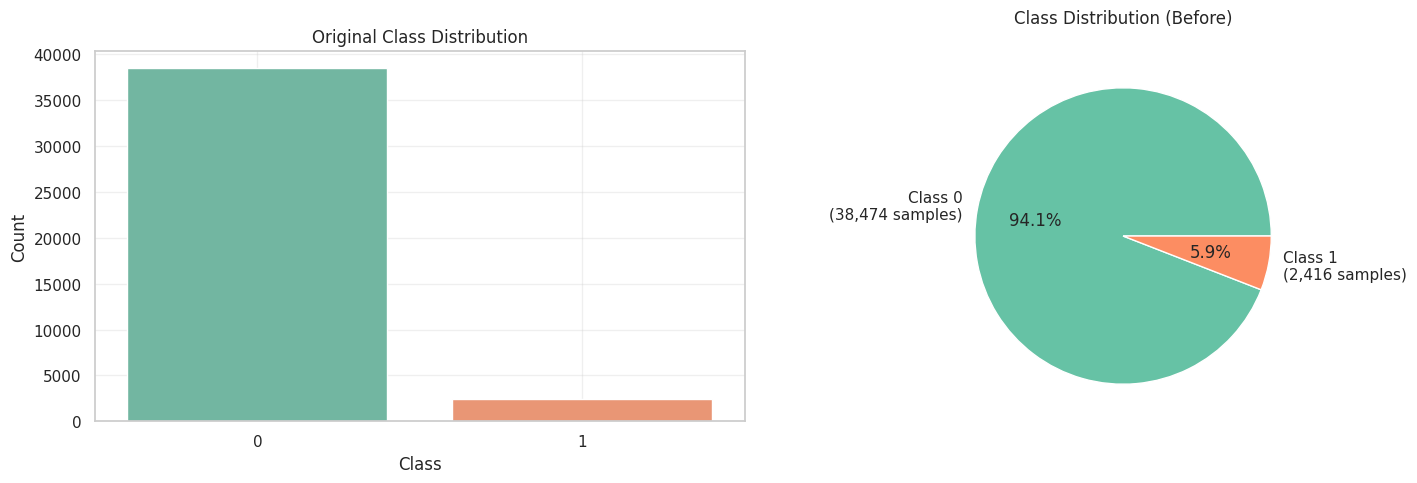


🎲 Random Oversampling Results


<ipython-input-8-0f8737b402d0>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(len(original_counts)), y=original_counts, palette='Set2', ax=ax1)
<ipython-input-8-0f8737b402d0>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(len(sampled_counts)), y=sampled_counts, palette='Set2', ax=ax2)


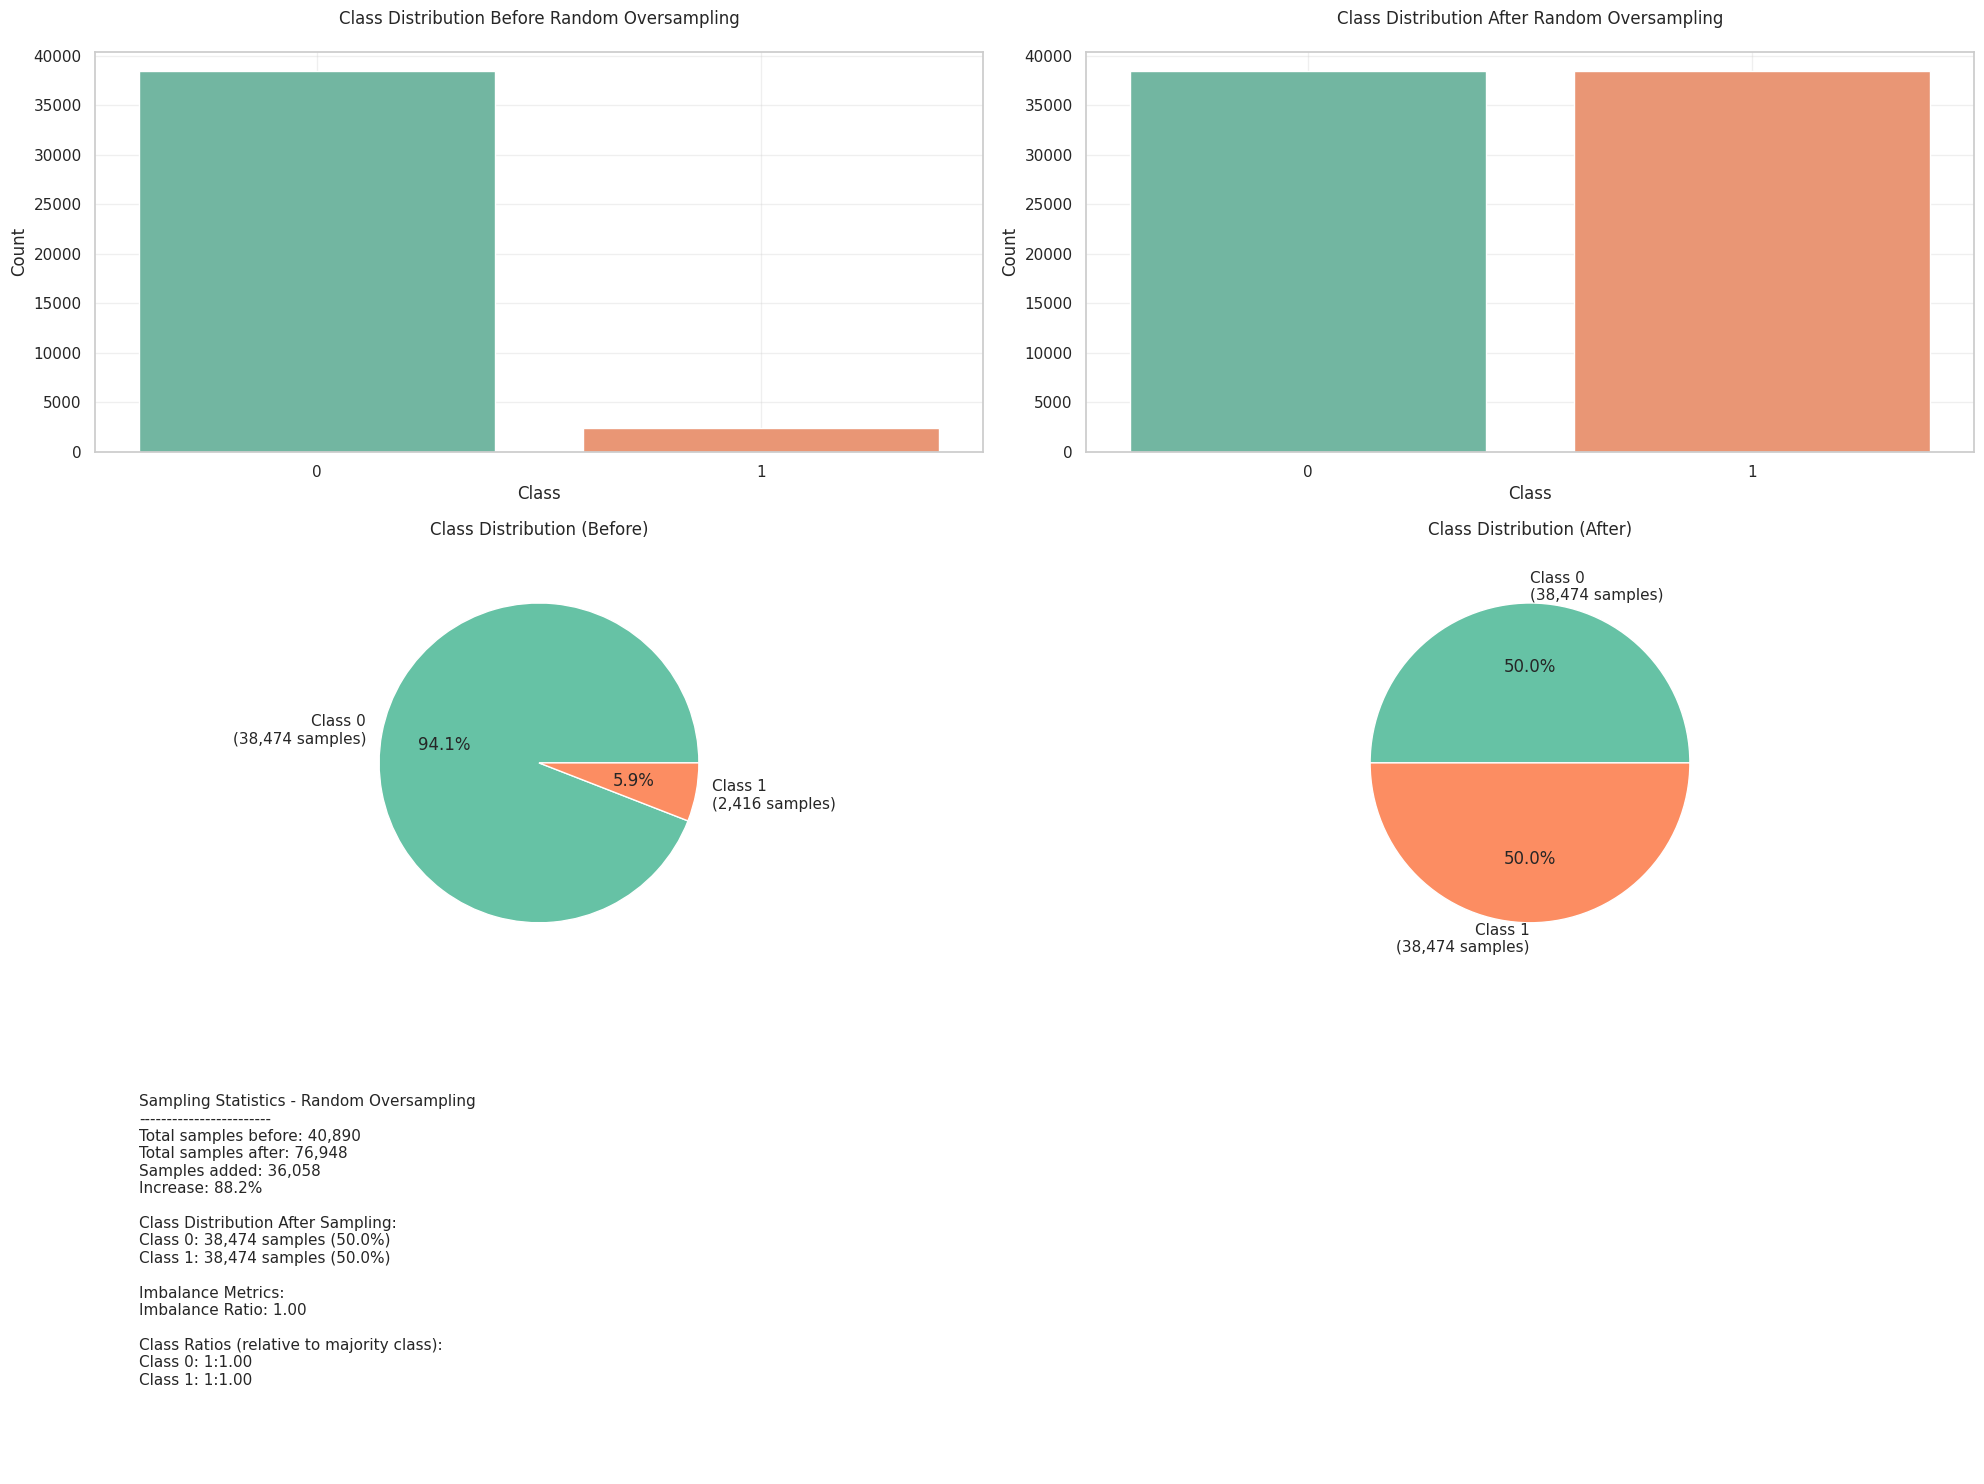


🎯 SMOTE Results


<ipython-input-8-0f8737b402d0>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(len(original_counts)), y=original_counts, palette='Set2', ax=ax1)
<ipython-input-8-0f8737b402d0>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(len(sampled_counts)), y=sampled_counts, palette='Set2', ax=ax2)


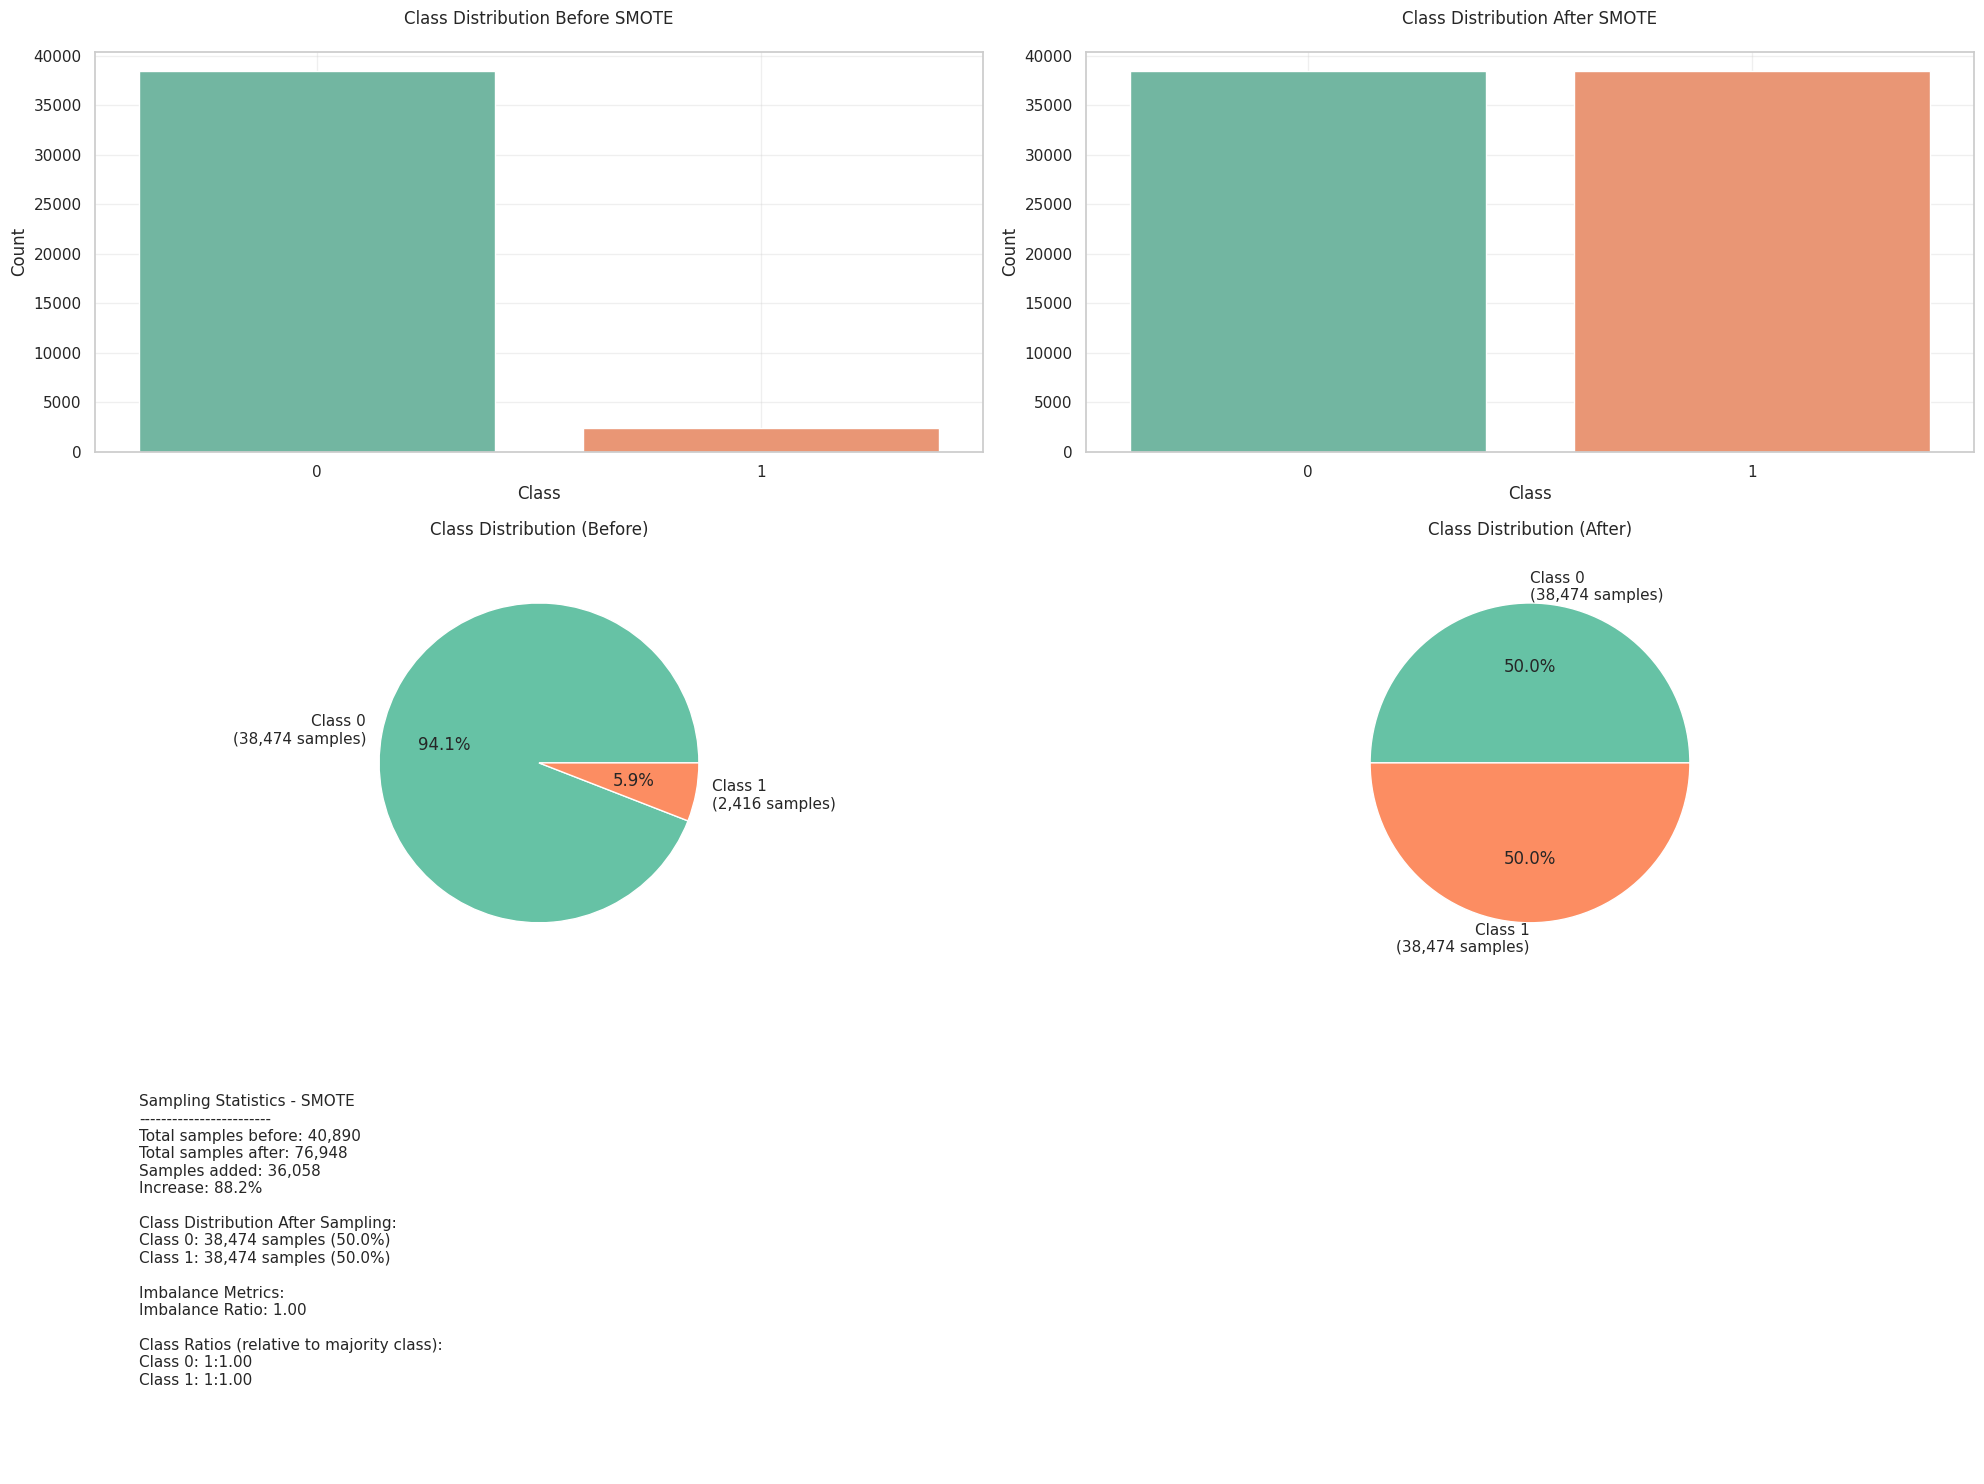


🔬 ADASYN Results


<ipython-input-8-0f8737b402d0>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(len(original_counts)), y=original_counts, palette='Set2', ax=ax1)
<ipython-input-8-0f8737b402d0>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(len(sampled_counts)), y=sampled_counts, palette='Set2', ax=ax2)


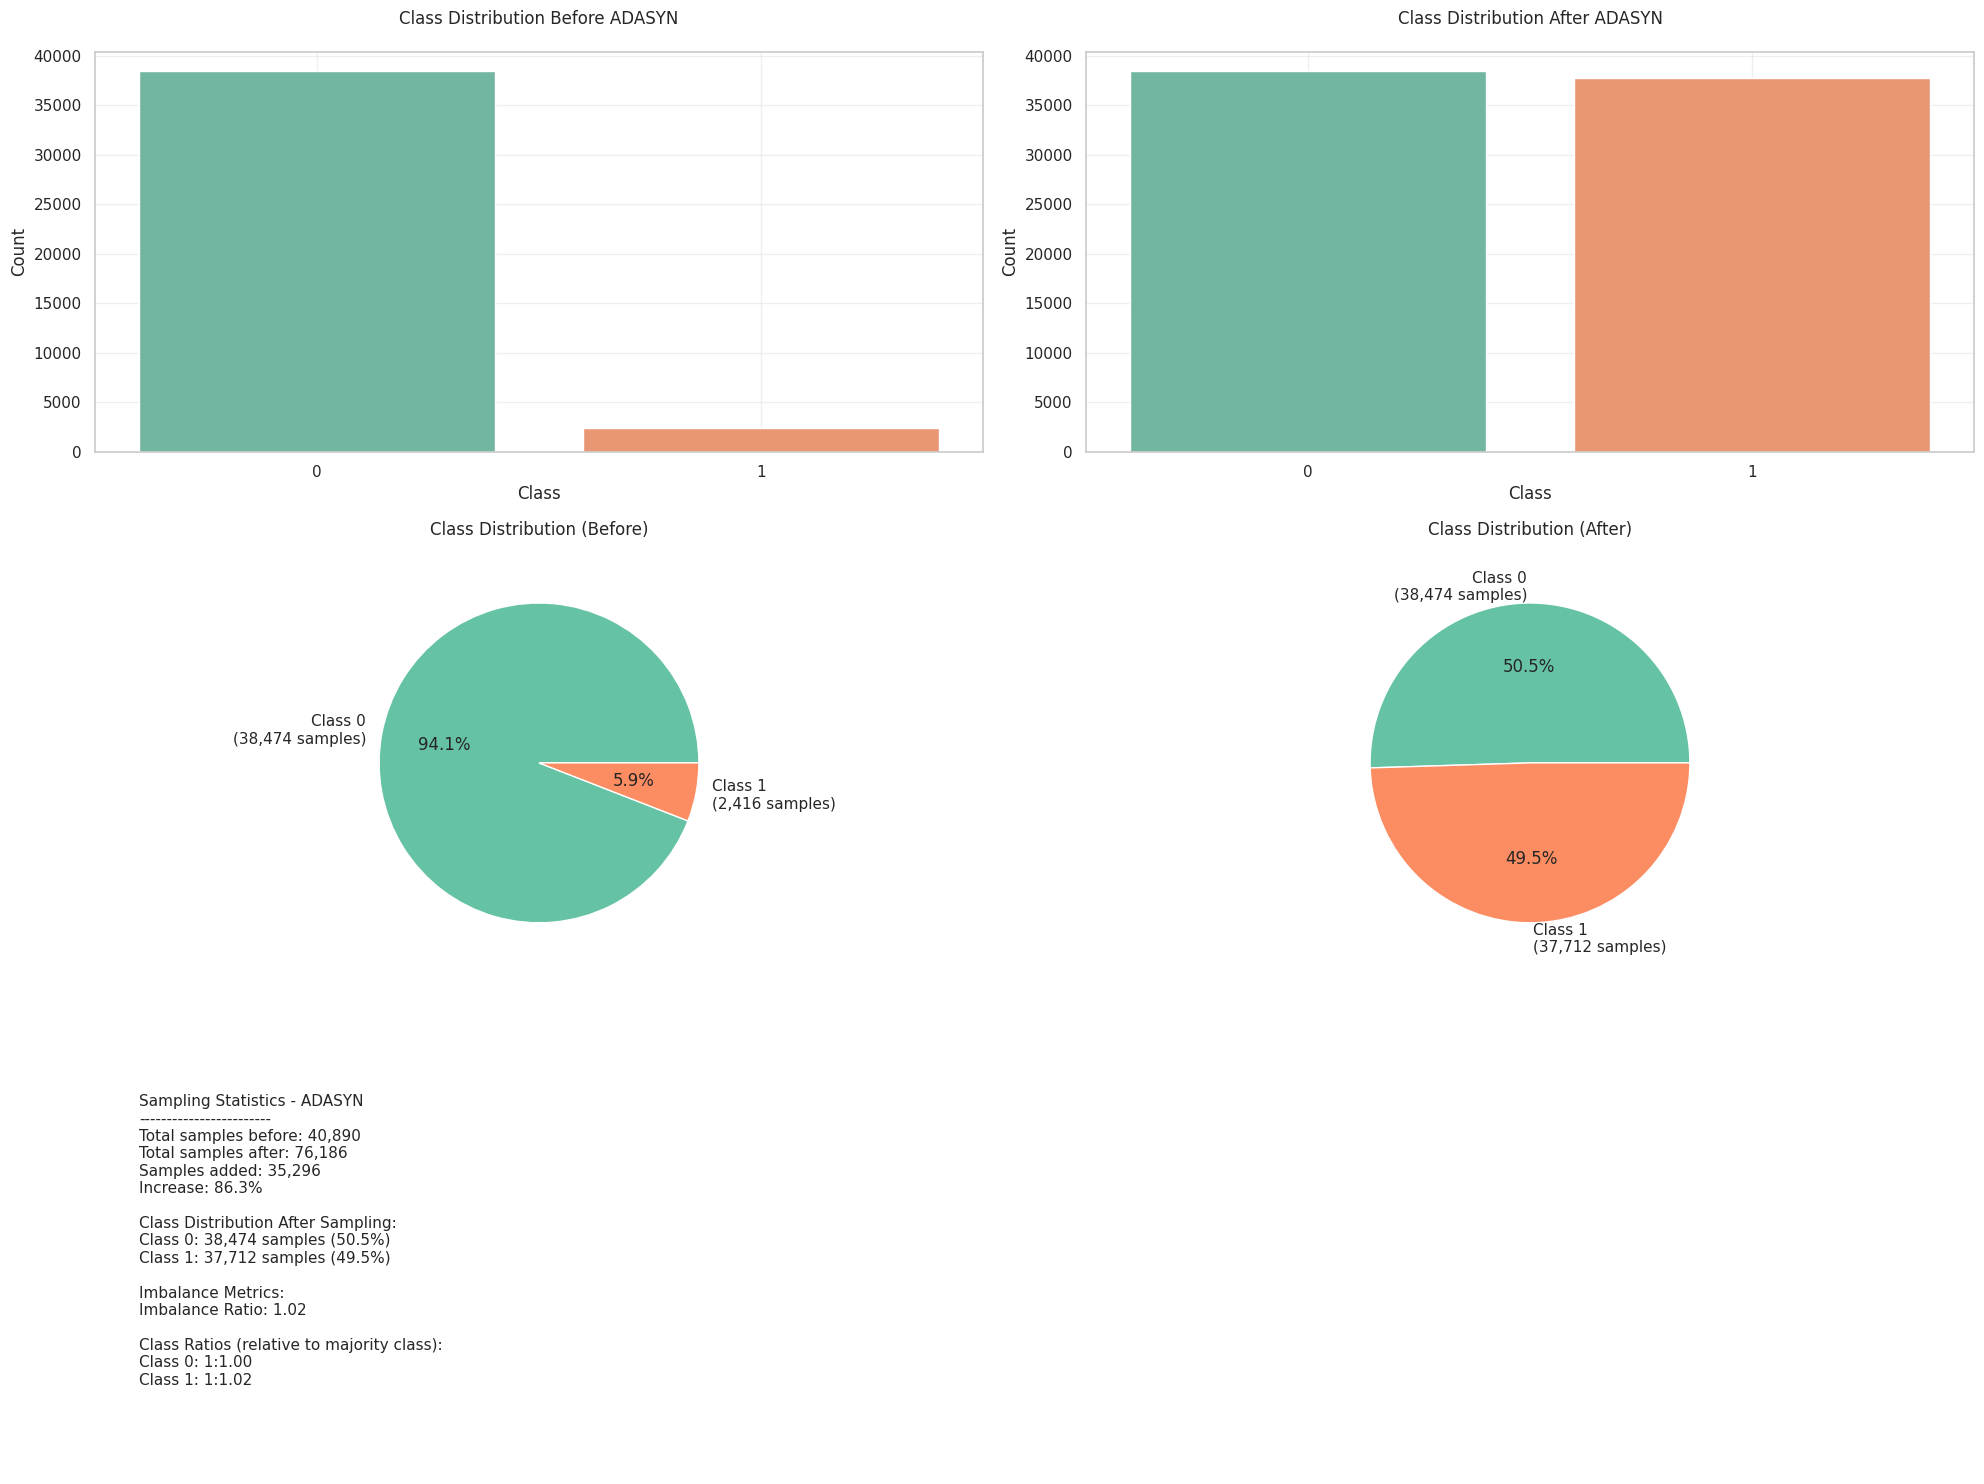

In [12]:
X_ros, y_ros, X_smote, y_smote, X_adasyn, y_adasyn = visualize_all_techniques(X_train_vectors, y_train)

In [16]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_auc_score, classification_report
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [17]:
def classification(X_train, y_train, X_test, y_test):

    classifiers = [
        KNeighborsClassifier(3),
        DecisionTreeClassifier(max_depth=19, min_samples_split=10),
        RandomForestClassifier(n_estimators=450),
        AdaBoostClassifier(n_estimators=100),
        GradientBoostingClassifier(n_estimators=300),
        LogisticRegression(C=1, penalty='l2')]

    for clf in classifiers:
        clf.fit(X_train, y_train)
        name = clf.__class__.__name__

        print("="*30)
        print(name)

        print('****Results****')
        train_predictions = clf.predict(X_test)

        # AUC Score
        acc = roc_auc_score(y_test, train_predictions)
        print("AUC: {:.4%}".format(acc))

        # Classification Report
        print("Classification report: \n", classification_report_imbalanced(y_test, train_predictions))

        # Confusion Matrix
        cm = confusion_matrix(y_test, train_predictions)

        # Plot confusion matrix using seaborn heatmap
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
        plt.title(f'Confusion Matrix for {name}')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()

    print("="*30)


In [18]:
def oversampling_results(X_ros, y_ros, X_smote, y_smote, X_adasyn, y_adasyn, X_test_vect, y_test):
    """
    Evaluate oversampling results using RandomOverSampler, SMOTE, and ADASYN.
    """

    print("Random Oversampler results \n")
    classification(X_ros, y_ros, X_test_vect, y_test)

    print("SMOTE results \n")
    classification(X_smote, y_smote, X_test_vect, y_test)

    print("ADASYN results \n")
    classification(X_adasyn, y_adasyn, X_test_vect, y_test)


Random Oversampler results 

KNeighborsClassifier
****Results****
AUC: 52.3340%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.87      0.18      0.91      0.39      0.16      9635
          1       0.08      0.18      0.87      0.11      0.39      0.14       588

avg / total       0.90      0.83      0.22      0.86      0.39      0.16     10223



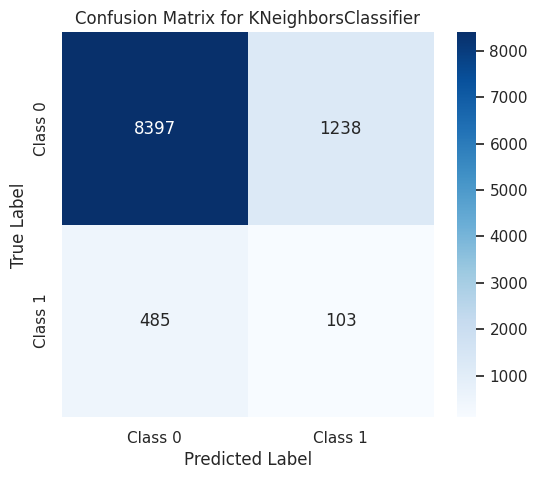

DecisionTreeClassifier
****Results****
AUC: 57.1362%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.79      0.35      0.87      0.53      0.29      9635
          1       0.09      0.35      0.79      0.15      0.53      0.26       588

avg / total       0.90      0.77      0.37      0.82      0.53      0.29     10223



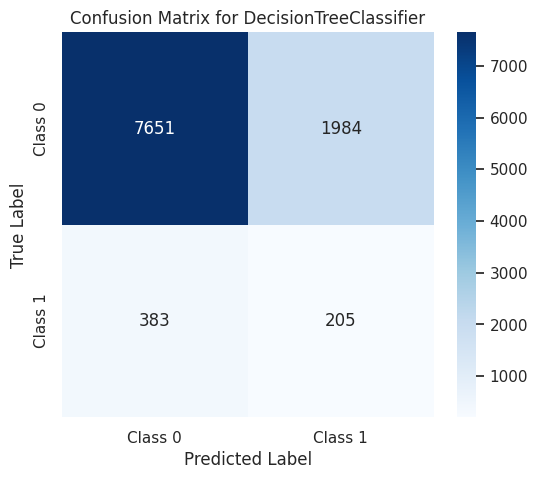

RandomForestClassifier
****Results****
AUC: 50.0000%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.94      1.00      0.00      0.97      0.00      0.00      9635
          1       0.00      0.00      1.00      0.00      0.00      0.00       588

avg / total       0.89      0.94      0.06      0.91      0.00      0.00     10223



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


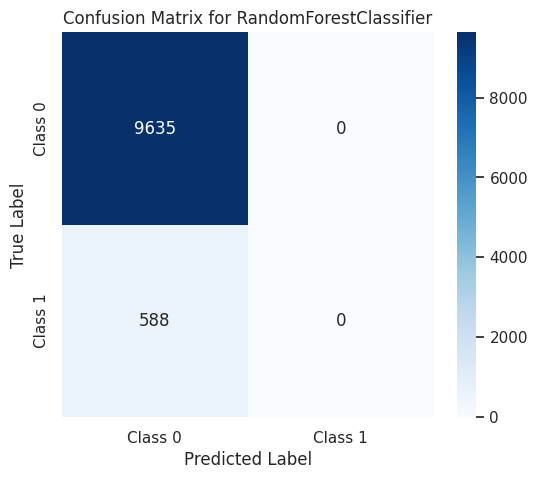

AdaBoostClassifier
****Results****
AUC: 62.6604%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.96      0.65      0.60      0.78      0.63      0.39      9635
          1       0.10      0.60      0.65      0.16      0.63      0.39       588

avg / total       0.91      0.65      0.60      0.74      0.63      0.39     10223



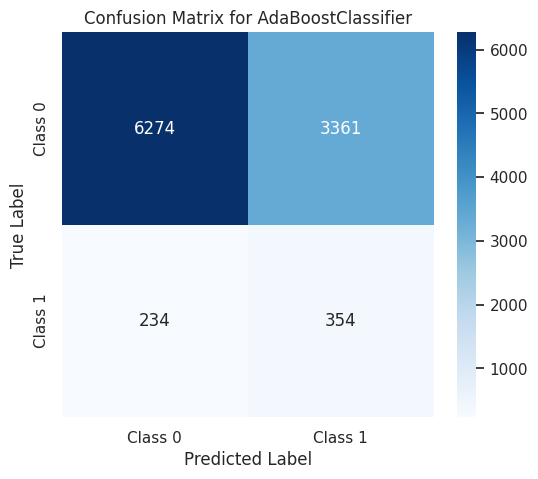

GradientBoostingClassifier
****Results****
AUC: 63.5358%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.96      0.78      0.49      0.86      0.62      0.39      9635
          1       0.12      0.49      0.78      0.19      0.62      0.37       588

avg / total       0.91      0.76      0.51      0.82      0.62      0.39     10223



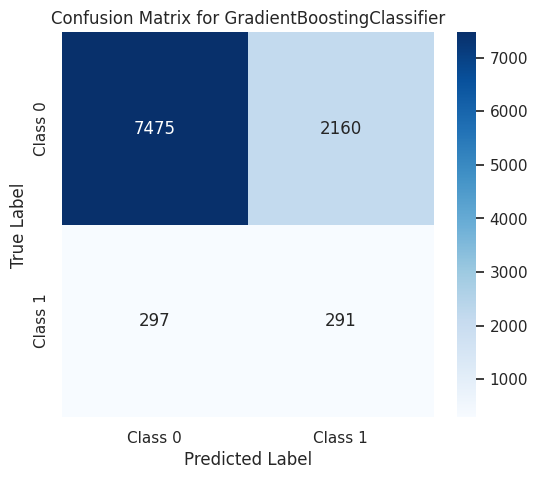

LogisticRegression
****Results****
AUC: 60.7978%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.96      0.62      0.59      0.76      0.61      0.37      9635
          1       0.09      0.59      0.62      0.15      0.61      0.37       588

avg / total       0.91      0.62      0.60      0.72      0.61      0.37     10223



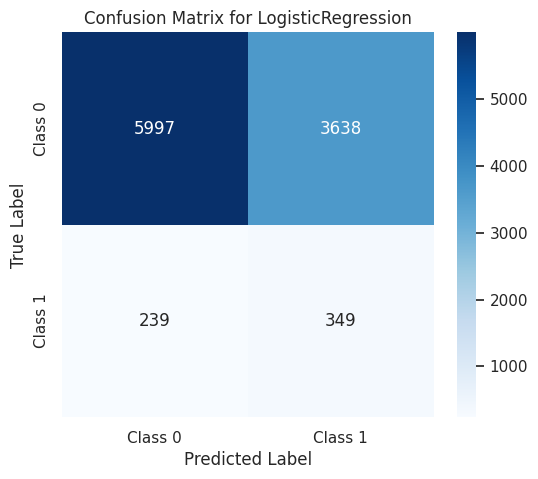

SMOTE results 

KNeighborsClassifier
****Results****
AUC: 56.7642%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.96      0.51      0.63      0.66      0.56      0.31      9635
          1       0.07      0.63      0.51      0.13      0.56      0.32       588

avg / total       0.91      0.51      0.62      0.63      0.56      0.32     10223



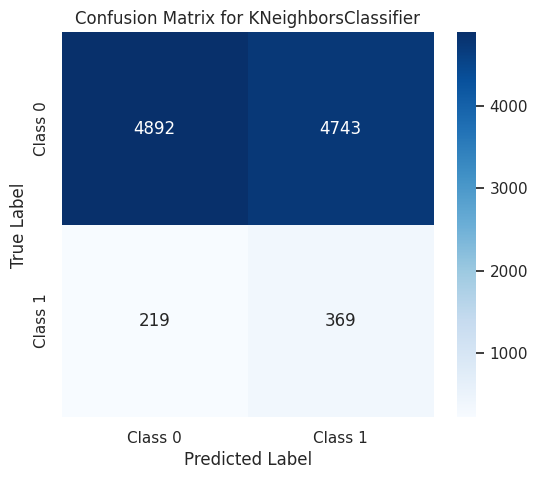

DecisionTreeClassifier
****Results****
AUC: 56.0374%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.73      0.39      0.83      0.53      0.29      9635
          1       0.08      0.39      0.73      0.13      0.53      0.28       588

avg / total       0.90      0.71      0.41      0.79      0.53      0.29     10223



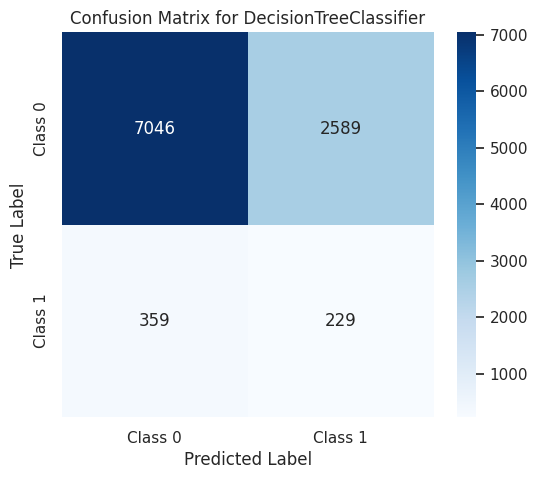

RandomForestClassifier
****Results****
AUC: 53.3009%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.98      0.09      0.96      0.29      0.09      9635
          1       0.19      0.09      0.98      0.12      0.29      0.08       588

avg / total       0.90      0.93      0.14      0.91      0.29      0.09     10223



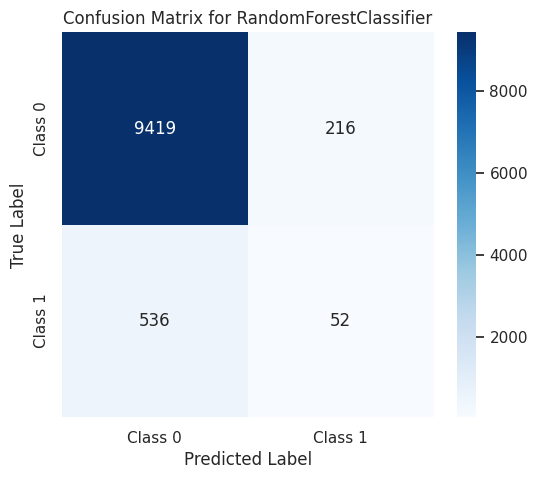

AdaBoostClassifier
****Results****
AUC: 62.1704%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.96      0.69      0.56      0.80      0.62      0.39      9635
          1       0.10      0.56      0.69      0.17      0.62      0.38       588

avg / total       0.91      0.68      0.56      0.77      0.62      0.39     10223



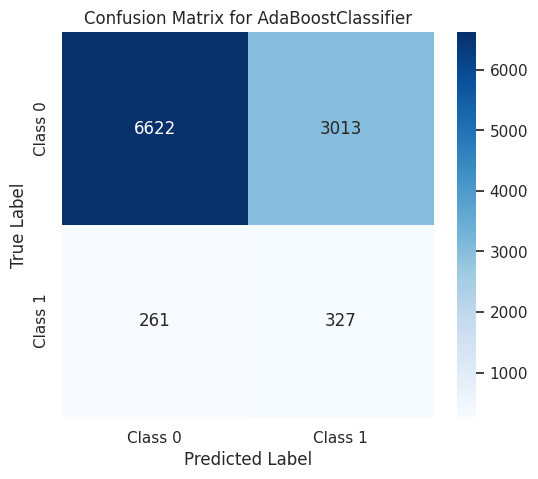

GradientBoostingClassifier
****Results****
AUC: 61.2957%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.96      0.80      0.43      0.87      0.59      0.35      9635
          1       0.11      0.43      0.80      0.18      0.59      0.33       588

avg / total       0.91      0.77      0.45      0.83      0.59      0.35     10223



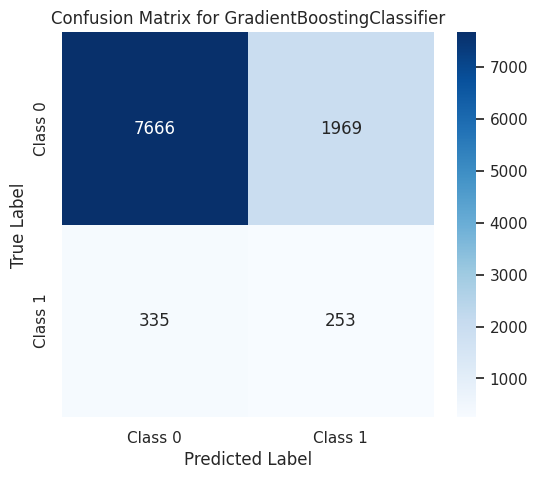

LogisticRegression
****Results****
AUC: 61.2233%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.96      0.63      0.59      0.76      0.61      0.38      9635
          1       0.09      0.59      0.63      0.16      0.61      0.37       588

avg / total       0.91      0.63      0.60      0.73      0.61      0.38     10223



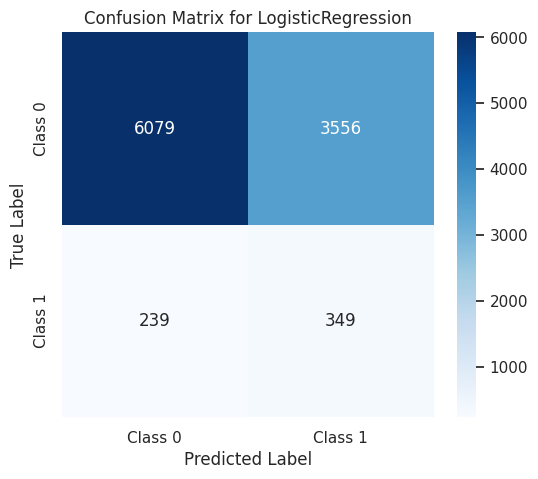

ADASYN results 

KNeighborsClassifier
****Results****
AUC: 56.7754%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.96      0.50      0.63      0.66      0.56      0.31      9635
          1       0.07      0.63      0.50      0.13      0.56      0.32       588

avg / total       0.91      0.51      0.63      0.63      0.56      0.31     10223



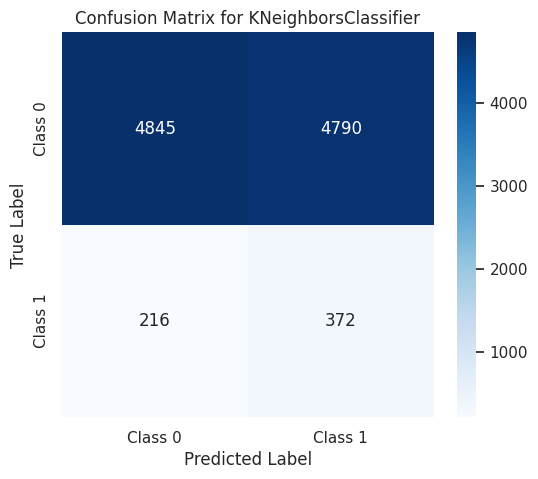

DecisionTreeClassifier
****Results****
AUC: 60.5310%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.96      0.74      0.47      0.83      0.59      0.36      9635
          1       0.10      0.47      0.74      0.16      0.59      0.34       588

avg / total       0.91      0.72      0.49      0.80      0.59      0.36     10223



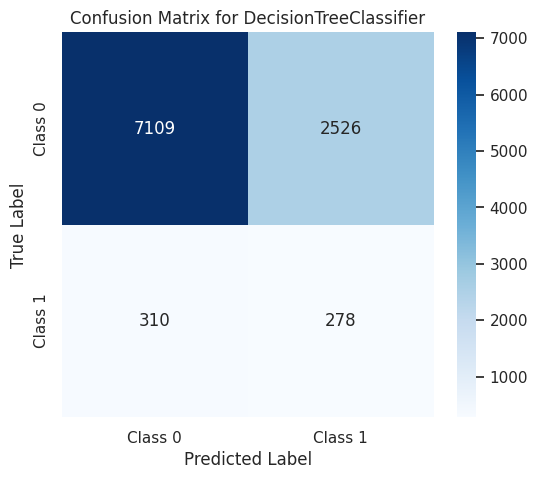

RandomForestClassifier
****Results****
AUC: 53.3859%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.98      0.09      0.96      0.30      0.10      9635
          1       0.20      0.09      0.98      0.12      0.30      0.08       588

avg / total       0.90      0.93      0.14      0.91      0.30      0.10     10223



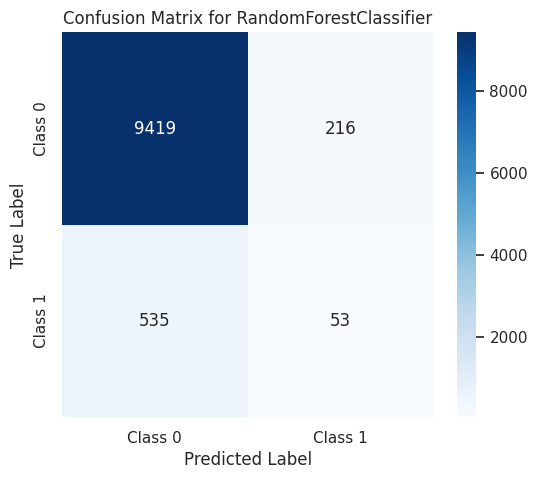

AdaBoostClassifier
****Results****
AUC: 62.3584%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.96      0.69      0.55      0.81      0.62      0.39      9635
          1       0.10      0.55      0.69      0.17      0.62      0.38       588

avg / total       0.91      0.69      0.56      0.77      0.62      0.39     10223



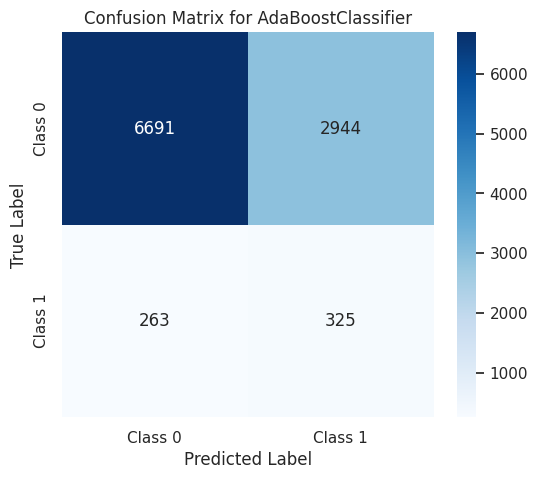

GradientBoostingClassifier
****Results****
AUC: 62.0630%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.96      0.79      0.45      0.87      0.60      0.37      9635
          1       0.12      0.45      0.79      0.19      0.60      0.34       588

avg / total       0.91      0.77      0.47      0.83      0.60      0.37     10223



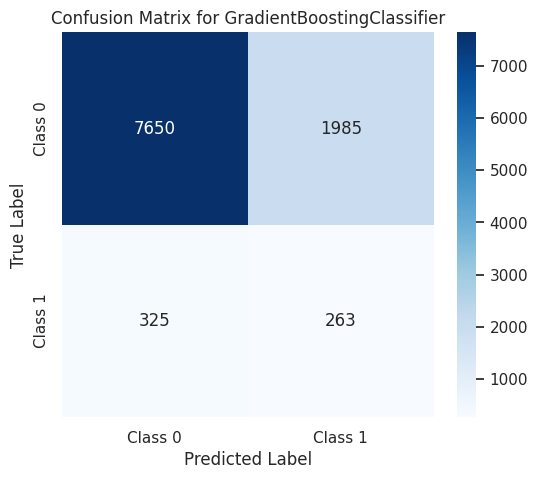

LogisticRegression
****Results****
AUC: 61.3086%
Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.96      0.66      0.56      0.78      0.61      0.38      9635
          1       0.09      0.56      0.66      0.16      0.61      0.37       588

avg / total       0.91      0.66      0.57      0.75      0.61      0.38     10223



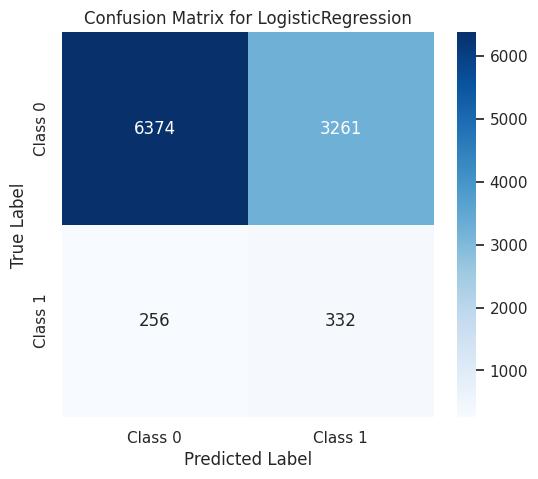

In [19]:
oversampling_results(X_ros, y_ros, X_smote, y_smote, X_adasyn, y_adasyn, X_test_vectors, y_test)